
# Trabalho - Comparação de Modelos de Representação Textual

## Embeddings
- **BERT**: mBERT
- **TF-IDF**
- **Word2Vec**

Até o momento o projeto faz:
1. **Web Scraping** do blog adalbertoday.blogspot.com
2. **Processamento de Linguagem Natural** (tokenização, normalização, stemming, lemmatização)
3. **Análise Comparativa** entre os três modelos
4. **Geração de Relatórios** com estatísticas entre eles

## Estrutura do Notebook
1. **Configuração Inicial** - Imports e setup, pois em minha máquina preciso fazer import colocando o link do python
2. **Processamento PLN** - Classe para limpeza e pré-processamento
3. **Web Scraping** - Extração de dados do blog
4. **Comparação dos Modelos** - Implementação e análise dos três modelos
5. **Execução** - Execução de cada etapa


---

## Configuração Inicial
Imports e setup, pois em minha máquina preciso fazer import colocando o link do python

### Baixando as dependencias

In [41]:
import subprocess
import sys

def instalar_dependencias():
    dependencias = [
        "pandas",
        "numpy", 
        "selenium",
        "nltk",
        "scikit-learn",
        "matplotlib",
        "seaborn",
        "gensim",
        "transformers",
        "torch"
    ]
    
    print("Instalando dependencias com repositorios")
    
    for dep in dependencias:
        try:
            print(f"Instalando {dep}")
            cmd = [
                sys.executable, "-m", "pip", "install", 
                "--trusted-host", "pypi.org",
                "--trusted-host", "pypi.python.org", 
                "--trusted-host", "files.pythonhosted.org",
                "--index-url", "https://pypi.org/simple/",
                "--upgrade", dep
            ]
            
            resultado = subprocess.run(cmd, capture_output=True, text=True)
            
            if resultado.returncode == 0:
                print(f"{dep} instalado")
            else:
                print(f"Erro ao instalar {dep}: {resultado.stderr}")
                
        except Exception as e:
            print(f"Erro na instalação de {dep}: {e}")
    
    print("\nInstalação ok")

instalar_dependencias()


Instalando dependencias com repositorios
Instalando pandas


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


pandas instalado
Instalando numpy


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


numpy instalado
Instalando selenium


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


selenium instalado
Instalando nltk


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


nltk instalado
Instalando scikit-learn


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


scikit-learn instalado
Instalando matplotlib


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


matplotlib instalado
Instalando seaborn


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


seaborn instalado
Instalando gensim


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


gensim instalado
Instalando transformers


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


transformers instalado
Instalando torch


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


torch instalado

Instalação ok


### Se der erro acima, tentar esse abaixo

```bash
pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --index-url https://pypi.org/simple/ pandas numpy selenium nltk scikit-learn matplotlib seaborn gensim transformers torch
```

### Valida se tem todas dependencias

In [42]:
def verificar_dependencias():
    dependencias_testar = {
        'pandas': 'import pandas as pd',
        'numpy': 'import numpy as np', 
        'selenium': 'from selenium import webdriver',
        'nltk': 'import nltk',
        'sklearn': 'from sklearn.feature_extraction.text import TfidfVectorizer',
        'matplotlib': 'import matplotlib.pyplot as plt',
        'seaborn': 'import seaborn as sns',
        'gensim': 'from gensim.models import Word2Vec',
        'transformers': 'from transformers import AutoTokenizer, AutoModel',
        'torch': 'import torch'
    }
    
    print("Verificando dependencias instaladas")
    
    tudo_ok = True
    
    for nome, codigo in dependencias_testar.items():
        try:
            exec(codigo)
            print(f"{nome:<12} - OK")
        except ImportError as e:
            print(f"{nome:<12} - ERRO: {e}")
            tudo_ok = False
        except Exception as e:
            print(f"{nome:<12} - AVISO: {e}")
    
    if tudo_ok:
        print("Todas as dependencias estão funcionando")
    else:
        print("Algumas dependencias faltam")
    
    return tudo_ok

verificar_dependencias()


Verificando dependencias instaladas
pandas       - OK
numpy        - OK
selenium     - OK
nltk         - OK
sklearn      - OK
matplotlib   - OK
seaborn      - OK
gensim       - OK
transformers - OK
torch        - OK
Todas as dependencias estão funcionando


True

### Imports e Dependências


In [43]:
# Imports basicos
import time
import hashlib
import os
from functools import wraps
from urllib.parse import urlparse

# Analise de dados
import pandas as pd
import numpy as np

# Web scraping
from selenium import webdriver
from selenium.common.exceptions import (
    WebDriverException, TimeoutException, StaleElementReferenceException
)
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Processamento de linguagem natural para o scraper
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer, WordNetLemmatizer
import string
import re

# Machine Learning e modelos
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from transformers import AutoTokenizer, AutoModel
import torch

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização avançada para clusterização e similaridade
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# Classificação com Naive Bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

print("Todos os imports realizados")


Todos os imports realizados


### Configurações Globais


In [44]:
MAX_POSTS = 20  # Número máximo de posts para processar (limitado para notebook)
DATABASE_DIR = "./database/trabalho2"

os.makedirs(DATABASE_DIR, exist_ok=True)

print(f"Diretório de dados: {DATABASE_DIR}")
print(f"Máximo de posts a processar: {MAX_POSTS}")


Diretório de dados: ./database/trabalho2
Máximo de posts a processar: 20


### Setup do NLTK


In [45]:
def setup_nltk_resources():
    required_resources = [
        'punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger', 'rslp'
    ]
    
    print("Configurando recursos do NLTK")
    for resource in required_resources:
        try:
            if resource == 'punkt':
                nltk.data.find('tokenizers/punkt')
            elif resource in ['stopwords', 'wordnet']:
                nltk.data.find(f'corpora/{resource}')
            elif resource == 'rslp':
                nltk.data.find('stemmers/rslp')
            else:
                nltk.data.find(f'taggers/{resource}')
            print(f"{resource} ja disponivel")
        except LookupError:
            print(f"Baixando recurso NLTK: {resource}")
            nltk.download(resource, quiet=True)
            print(f"{resource} baixado com sucesso")

setup_nltk_resources()
print("\nSetup do NLTK concluido")


Configurando recursos do NLTK
punkt ja disponivel
stopwords ja disponivel
Baixando recurso NLTK: wordnet
wordnet baixado com sucesso
averaged_perceptron_tagger ja disponivel
rslp ja disponivel

Setup do NLTK concluido


[nltk_data] Error loading wordnet: HTTP Error 429: Too Many Requests


### Funções comuns
Coloquei as funções que usarei na integração com as páginas, principalmente para conexão

In [46]:
def _hash_text(s: str) -> str:
    return hashlib.sha1(s.encode("utf-8", errors="ignore")).hexdigest()

def _extract_filename_from_url(url: str) -> str:
    parsed_url = urlparse(url)
    path = parsed_url.path.strip('/')
    parts = path.split('/')
    
    if len(parts) >= 3:
        year, month, title = parts[0], parts[1], parts[2]
        if title.endswith('.html'):
            title = title[:-5]
        return f"{year}-{month}-{title}.txt"
    else:
        filename = path.replace('/', '-')
        if filename.endswith('.html'):
            filename = filename[:-5]
        return f"{filename}.txt"

def build_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--headless=new")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--window-size=1920,1080")
    options.add_argument("--log-level=3")
    options.add_argument("--remote-allow-origins=*")
    
    driver = webdriver.Chrome(options=options)
    driver.set_page_load_timeout(60)
    return driver

RECONECT_EXC = (WebDriverException,)

def with_reconnect(method):
    @wraps(method)
    def wrapper(self, *args, **kwargs):
        last_exc = None
        for attempt in range(3):
            try:
                return method(self, *args, **kwargs)
            except RECONECT_EXC as e:
                last_exc = e
                print(f"Sessão perdida. Reiniciando driver. (tentativa {attempt+1}/3)")
                try: 
                    self.driver.quit()
                except Exception: 
                    pass
                self.driver = build_driver()
                self.wait = WebDriverWait(self.driver, 20)
                if hasattr(self, 'base_url'):
                    try:
                        self.driver.get(self.base_url)
                        time.sleep(2)
                    except Exception as e2:
                        print(f"Falha ao retornar para a URL: {e2}")
                time.sleep(0.5 + attempt * 0.5)
            except TimeoutException as e:
                last_exc = e
                print(f"Timeout. Tentando novamente. (tentativa {attempt+1}/3)")
                time.sleep(1.2 + attempt * 0.5)
        raise last_exc
    return wrapper

print("Funções comuns implementadas")


Funções comuns implementadas


---
## Classe ProcessadorPLN

Esta classe implementa:
- **Tokenização**: Divisão do texto em sentenças e palavras
- **Normalização**: Remoção de pontuação, stopwords e simbolos
- **Stemming**: Redução das palavras ao seu radical usando RSLP  
- **Lemmatização**: Redução das palavras
- **Extração de Metadados**: Identificação de datas, nomes próprios e números

In [47]:
class ProcessadorPLN:
    def __init__(self):
        self.stemmer = RSLPStemmer()
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('portuguese'))
        print("ProcessadorPLN inicializado")
    
    def tokenizar(self, texto: str) -> dict:
        try:
            sentencas = sent_tokenize(texto, language='portuguese')
            tokens = word_tokenize(texto.lower(), language='portuguese')
            
            return {
                'sentencas': sentencas,
                'tokens': tokens,
                'num_sentencas': len(sentencas),
                'num_tokens': len(tokens)
            }
        except Exception as e:
            print(f"Erro na tokenização: {e}")
            return {'sentencas': [], 'tokens': [], 'num_sentencas': 0, 'num_tokens': 0}
    
    def normalizar_texto(self, tokens: list) -> list:
        try:
            tokens_limpos = []
            for token in tokens:
                token_lower = token.lower()
                if (token_lower not in string.punctuation and 
                    not token_lower.isdigit() and 
                    len(token_lower) > 2):
                    tokens_limpos.append(token_lower)
            
            tokens_sem_stopwords = [
                token for token in tokens_limpos 
                if token not in self.stop_words
            ]
            
            tokens_filtrados = [
                token for token in tokens_sem_stopwords 
                if len(token) >= 3 and any(c.isalpha() for c in token)
            ]
            
            return tokens_filtrados
            
        except Exception as e:
            print(f"Erro na normalização: {e}")
            return []
    
    def aplicar_stemming(self, tokens: list) -> list:
        try:
            return [self.stemmer.stem(token) for token in tokens]
        except Exception as e:
            print(f"Erro no stemming: {e}")
            return tokens
    
    def aplicar_lemmatizacao(self, tokens: list) -> list:
        try:
            lemmas = []
            for token in tokens:
                lemma = self.lemmatizer.lemmatize(token, pos='n')  # Substantivo
                if lemma == token:
                    lemma = self.lemmatizer.lemmatize(token, pos='v')  # Verbo
                if lemma == token:
                    lemma = self.lemmatizer.lemmatize(token, pos='a')  # Adjetivo
                lemmas.append(lemma)
            return lemmas
        except Exception as e:
            print(f"Erro na lemmatização: {e}")
            return tokens
    
    def extrair_metadados(self, texto: str, url: str) -> dict:
        try:
            metadados = {
                'url': url,
                'tamanho_caracteres': len(texto),
                'datas_encontradas': [],
                'numeros_relevantes': [],
                'nomes_proprios': []
            }
            
            # Extração de datas
            padrao_data = r'\b\d{1,2}[/\-]\d{1,2}[/\-]\d{2,4}\b'
            datas = re.findall(padrao_data, texto, re.IGNORECASE)
            metadados['datas_encontradas'] = list(set(datas))[:5]
            
            # Extração de números relevantes
            numeros = re.findall(r'\b(?:19|20)\d{2}\b|\b\d{1,3}(?:[.,]\d{3})*\b', texto)
            metadados['numeros_relevantes'] = list(set(numeros))[:10]
            
            # Extração de nomes próprios
            entidades = re.findall(r'\b[A-ZÁÉÍÓÚÂÊÔÀÇ][a-záéíóúâêôàçãõ]{2,}\b', texto)
            palavras_comuns = {'O', 'A', 'Os', 'As', 'E', 'De', 'Da', 'Do', 'Em', 'Na', 'No'}
            entidades_filtradas = [e for e in entidades if e not in palavras_comuns]
            metadados['nomes_proprios'] = list(set(entidades_filtradas))[:10]
            
            return metadados
            
        except Exception as e:
            print(f"Erro na extração de metadados: {e}")
            return {'url': url, 'erro': str(e)}
    
    def processar_texto_completo(self, texto: str, url: str, titulo: str = "") -> dict:
        try:
            # 1. Tokenização
            resultado_tokenizacao = self.tokenizar(texto)
            tokens_originais = resultado_tokenizacao['tokens']
            
            # 2. Normalização
            tokens_normalizados = self.normalizar_texto(tokens_originais)
            
            # 3. Stemming
            tokens_stemming = self.aplicar_stemming(tokens_normalizados)
            
            # 4. Lemmatização
            tokens_lemmatizacao = self.aplicar_lemmatizacao(tokens_normalizados)
            
            # 5. Extração de metadados
            metadados = self.extrair_metadados(texto, url)
            
            # 6. Resultado estruturado
            resultado = {
                'id': url,
                'titulo': titulo,
                'texto_bruto': texto,
                'tokens_originais': tokens_originais,
                'tokens_normalizados': tokens_normalizados,
                'tokens_stemming': tokens_stemming,
                'tokens_lemmatizacao': tokens_lemmatizacao,
                'estatisticas': {
                    'num_sentencas': resultado_tokenizacao['num_sentencas'],
                    'num_tokens_originais': resultado_tokenizacao['num_tokens'],
                    'num_tokens_normalizados': len(tokens_normalizados),
                    'num_caracteres': len(texto)
                },
                'metadados': metadados,
                'hash_conteudo': _hash_text(texto)
            }
            
            return resultado
            
        except Exception as e:
            print(f"Erro no processamento completo: {e}")
            return {
                'id': url,
                'titulo': titulo,
                'texto_bruto': texto,
                'erro_processamento': str(e),
                'hash_conteudo': _hash_text(texto)
            }

print("Classe ProcessadorPLN implementada!")


Classe ProcessadorPLN implementada!


In [48]:
class AdalbertoScraper:
    def __init__(self):
        self.driver = build_driver()
        self.wait = WebDriverWait(self.driver, 20)
        self.base_url = "https://adalbertoday.blogspot.com/"
        self.processador_pln = ProcessadorPLN()
        self.urls_processadas = set()
        self.hashes_conteudo = set()
        self.resultados = []
        
        print(f"AdalbertoScraper inicializado - máximo {MAX_POSTS} posts")
    
    def _get(self, url):
        self.driver.get(url)
    
    def _extrair_texto_limpo(self, elemento) -> str:
        try:
            texto = elemento.text
            if not texto:
                texto = self.driver.execute_script("return arguments[0].textContent;", elemento)
            
            texto = re.sub(r'\s+', ' ', texto)
            texto = re.sub(r'\n\s*\n', '\n\n', texto)
            
            return texto.strip()
        except Exception as e:
            print(f"Erro na extração de texto: {e}")
            return ""
    
    @with_reconnect
    def abrir_blog(self):
        print(f"Abrindo blog: {self.base_url}")
        self._get(self.base_url)
        self.wait.until(EC.presence_of_element_located((By.TAG_NAME, "body")))
        print("Blog acessado com sucesso")
    
    @with_reconnect
    def encontrar_links_posts(self) -> list:
        print("Procurando links dos posts")
        
        try:
            self.wait.until(EC.presence_of_element_located((By.TAG_NAME, "a")))
            elementos_link = self.driver.find_elements(By.TAG_NAME, "a")
            
            links_encontrados = []
            for elemento in elementos_link:
                try:
                    href = elemento.get_attribute("href")
                    if href and 'adalbertoday.blogspot.com' in href:
                        if re.search(r'/\d{4}/\d{2}/', href):
                            if href not in links_encontrados:
                                links_encontrados.append(href)
                except Exception:
                    continue
            
            print(f"{len(links_encontrados)} posts encontrados")
            return links_encontrados
            
        except Exception as e:
            print(f"Erro ao buscar links: {e}")
            return []
    
    @with_reconnect
    def processar_post(self, url: str) -> dict:
        print(f"Processando post: {url}")
        
        try:
            if url in self.urls_processadas:
                return None
            
            self._get(url)
            self.wait.until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            
            # Extrair título
            try:
                titulo_elem = self.wait.until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "h3.post-title, .entry-title, .post-title"))
                )
                titulo = titulo_elem.text.strip() if titulo_elem else "Sem título"
            except:
                titulo = "Sem título"
            
            # Extrair conteúdo
            try:
                conteudo_elem = self.wait.until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, ".post-body, .entry-content, .post-content"))
                )
                texto_limpo = self._extrair_texto_limpo(conteudo_elem)
            except:
                print("Texto do post não encontrado")
                return None
            
            # Verificar duplicação
            hash_conteudo = _hash_text(texto_limpo)
            if hash_conteudo in self.hashes_conteudo:
                return None

            # Processar com PLN
            resultado = self.processador_pln.processar_texto_completo(
                texto_limpo, url, titulo
            )
            
            self.urls_processadas.add(url)
            self.hashes_conteudo.add(hash_conteudo)
            
            print(f"Post processado: {titulo[:50]}...")
            print(f"   Caracteres: {len(texto_limpo)}")
            print(f"   Tokens normalizados: {len(resultado.get('tokens_normalizados', []))}")
            
            return resultado
            
        except Exception as e:
            print(f"Erro ao processar post {url}: {e}")
            return None
    
    def _salvar_arquivo_individual(self, resultado: dict, url: str):
        try:
            nome_arquivo = _extract_filename_from_url(url)
            caminho = os.path.join(DATABASE_DIR, nome_arquivo)
            
            with open(caminho, 'w', encoding='utf-8') as f:
                f.write(resultado.get('texto_bruto', ''))
                
        except Exception as e:
            print(f"Erro ao salvar arquivo: {e}")
    
    def processar_lista_posts(self):
        try:
            self.abrir_blog()
            links_posts = self.encontrar_links_posts()
            
            if not links_posts:
                print("Nenhum post encontrado")
                return
            
            if len(links_posts) > MAX_POSTS:
                print(f"Limitando processamento a {MAX_POSTS} posts")
                links_posts = links_posts[:MAX_POSTS]
            
            print(f"\nProcessando {len(links_posts)} posts")
            
            for i, url in enumerate(links_posts, 1):
                print(f"\n[{i}/{len(links_posts)}] Processando post {i}")
                
                resultado = self.processar_post(url)
                if resultado:
                    self.resultados.append(resultado)
                    self._salvar_arquivo_individual(resultado, url)
                
                if i < len(links_posts):
                    time.sleep(2)  # Pausa entre requisições
            
            print(f"\nProcessamento concluído: {len(self.resultados)} posts processados")
            
        except Exception as e:
            print(f"Erro no scraping: {e}")
    
    def close(self):
        try:
            self.driver.quit()
            print("Navegador fechado")
        except Exception:
            pass

print("Classe AdalbertoScraper implementada")


Classe AdalbertoScraper implementada


---
## Classe ComparadorModelos

Esta classe implementa e compara os três modelos de representação textual:
- **BERT**
- **TF-IDF**
- **Word2Vec**


In [ ]:
class ComparadorModelos:
    def __init__(self):
        print("Inicializando ComparadorModelos...")
        
        self.bert_model_name = "neuralmind/bert-base-portuguese-cased"
        self.bert_tokenizer = None
        self.bert_model = None
        
        self.tfidf_vectorizer = TfidfVectorizer(
            max_features=1000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.95
        )
        
        self.word2vec_model = None
        self.resultados_comparacao = {}
        
        print("ComparadorModelos inicializado")
    
    def _carregar_bert(self):
        if self.bert_tokenizer is None or self.bert_model is None:
            print("Carregando modelo BERT")
            try:
                # Inicio do encode_sentences da Aula 7
                # como meu texto é portugues do adalbertoday, tento usar em português
                self.bert_tokenizer = AutoTokenizer.from_pretrained(self.bert_model_name)
                self.bert_model = AutoModel.from_pretrained(self.bert_model_name)
                self.bert_model.eval()
                print("BERT carregado com sucesso")
            except Exception as e:
                print(f"Erro ao carregar BERT: {e}")
                print("Tentando modelo multilingual")
                self.bert_model_name = "bert-base-multilingual-cased"
                self.bert_tokenizer = AutoTokenizer.from_pretrained(self.bert_model_name)
                self.bert_model = AutoModel.from_pretrained(self.bert_model_name)
                self.bert_model.eval()
                print("BERT multilingual carregado")
    
    def processar_textos_bert(self, textos: list) -> np.ndarray:
        self._carregar_bert()
        
        print(f"Processando {len(textos)} textos com BERT")
        embeddings = []
        inicio = time.time() # usado pra comparar os outros modelos para saber qual mais rápido
        
        for i, texto in enumerate(textos):
            try:
                inputs = self.bert_tokenizer(
                    texto, 
                    return_tensors="pt", 
                    truncation=True, 
                    padding=True, 
                    max_length=512 # coloquei 512 pois vi que o BERT não suporta tanto, estava dando erro quando não coloquei
                )
                
                with torch.no_grad():
                    outputs = self.bert_model(**inputs)
                    embedding = outputs.last_hidden_state[:, 0, :].numpy()
                    embeddings.append(embedding.flatten())
                
                if (i + 1) % 5 == 0:
                    print(f"- BERT: {i + 1}/{len(textos)} processados")
                    
            except Exception as e:
                print(f"Erro no texto {i}: {e}")
                embeddings.append(np.zeros(768))
        
        tempo_total = time.time() - inicio
        print(f"BERT concluído em {tempo_total:.2f}s")
        return np.array(embeddings)
    
    def processar_textos_tfidf(self, textos: list) -> np.ndarray:
        print(f"Processando {len(textos)} textos com TF-IDF")
        
        inicio = time.time()
        try:
            matriz_tfidf = self.tfidf_vectorizer.fit_transform(textos)
            embeddings = matriz_tfidf.toarray()
            
            tempo_total = time.time() - inicio
            print(f"TF-IDF concluído em {tempo_total:.2f}s")
            print(f"- Dimensões: {embeddings.shape}")
            
            return embeddings
            
        except Exception as e:
            print(f"Erro no TF-IDF: {e}")
            return np.zeros((len(textos), 1000))
    
    def processar_textos_word2vec(self, tokens_normalizados: list) -> np.ndarray:
        print(f"Treinando Word2Vec com {len(tokens_normalizados)} documentos")
        
        inicio = time.time()
        try:
            # Vi essa configuração na internet, não sei se é a melhor
            # mas vi em dois tutoriais diferentes que usavam algumas dessas configurações
            self.word2vec_model = Word2Vec(
                sentences=tokens_normalizados,
                vector_size=300,
                window=5,
                min_count=2,
                workers=4,
                epochs=10
            )
            
            print(f"Vocabulário Word2Vec: {len(self.word2vec_model.wv.key_to_index)} palavras")
            
            embeddings = []
            for tokens in tokens_normalizados:
                if not tokens:
                    embeddings.append(np.zeros(300))
                    continue
                
                vetores_palavras = []
                for token in tokens:
                    if token in self.word2vec_model.wv:
                        vetores_palavras.append(self.word2vec_model.wv[token])
                
                if vetores_palavras:
                    embedding_medio = np.mean(vetores_palavras, axis=0)
                    embeddings.append(embedding_medio)
                else:
                    embeddings.append(np.zeros(300))
            
            tempo_total = time.time() - inicio
            print(f"Word2Vec concluído em {tempo_total:.2f}s")
            return np.array(embeddings)
            
        except Exception as e:
            print(f"Erro no Word2Vec: {e}")
            return np.zeros((len(tokens_normalizados), 300))
    
    def calcular_similaridades(self, embeddings: np.ndarray, nome_modelo: str) -> dict:
        print(f"Calculando similaridades para {nome_modelo}")
        
        try:
            matriz_sim = cosine_similarity(embeddings)
            
            mask = ~np.eye(matriz_sim.shape[0], dtype=bool)
            similaridades = matriz_sim[mask]
            
            stats = {
                'modelo': nome_modelo,
                'dimensoes': embeddings.shape[1],
                'num_documentos': embeddings.shape[0],
                'similaridade_media': np.mean(similaridades),
                'similaridade_std': np.std(similaridades),
                'similaridade_min': np.min(similaridades),
                'similaridade_max': np.max(similaridades),
                'matriz_similaridade': matriz_sim
            }
            
            return stats
            
        except Exception as e:
            print(f"Erro no cálculo de similaridades: {e}")
            return {'modelo': nome_modelo, 'erro': str(e)}
    
    def comparar_modelos(self, dados_processados: list) -> dict:
        print("\n" + "="*60)
        print("INICIANDO COMPARAÇÃO DE MODELOS")
        print("="*60)
        
        if not dados_processados:
            print("Nenhum dado para processar, validar se o blog foi processado corretamente")
            return {}
        
        textos_brutos = [item.get('texto_bruto', '') for item in dados_processados]
        tokens_normalizados = [item.get('tokens_normalizados', []) for item in dados_processados]
        
        print(f"Processando {len(textos_brutos)} documentos")
        
        indices_validos = [i for i, texto in enumerate(textos_brutos) if texto.strip()]
        textos_validos = [textos_brutos[i] for i in indices_validos]
        tokens_validos = [tokens_normalizados[i] for i in indices_validos]
        
        print(f"Documentos válidos: {len(textos_validos)}")
        
        resultados = {}
        
        # TF-IDF
        try:
            print("\nTF-IDF")
            print("-" * 30)
            embeddings_tfidf = self.processar_textos_tfidf(textos_validos)
            resultados['tfidf'] = self.calcular_similaridades(embeddings_tfidf, "TF-IDF")
        except Exception as e:
            print(f"Erro no TF-IDF: {e}")
            resultados['tfidf'] = {'modelo': 'TF-IDF', 'erro': str(e)}
        
        # Word2Vec
        try:
            print("\nWord2Vec")
            print("-" * 30)
            embeddings_w2v = self.processar_textos_word2vec(tokens_validos)
            resultados['word2vec'] = self.calcular_similaridades(embeddings_w2v, "Word2Vec")
        except Exception as e:
            print(f"Erro no Word2Vec: {e}")
            resultados['word2vec'] = {'modelo': 'Word2Vec', 'erro': str(e)}
        
        # BERT
        try:
            print("\nBERT")
            print("-" * 30)
            embeddings_bert = self.processar_textos_bert(textos_validos)
            resultados['bert'] = self.calcular_similaridades(embeddings_bert, "BERT")
        except Exception as e:
            print(f"Erro no BERT: {e}")
            resultados['bert'] = {'modelo': 'BERT', 'erro': str(e)}
        
        self.resultados_comparacao = resultados
        return resultados

print("Classe ComparadorModelos implementada")


Classe ComparadorModelos implementada


---
## Análise Avançada: Clusterização e Similaridade

Esta seção implementa análises avançadas inspiradas no exemplo do professor:
- **Tabelas de Similaridade**: Heatmaps interativos para visualizar proximidade entre documentos
- **Clusterização K-Means**: Agrupamento automático de documentos por similaridade
- **Visualização 2D**: Projeção com PCA para scatter plots comparativos


In [ ]:
def plot_similarity_heatmap_px(
    X,
    titulos=None,           # lista de títulos dos documentos para o hover
    title="Similaridade (cosseno)",
    cmap="Blues",
    mask_upper=False,       # True: mostra só triângulo inferior
    vmin=0.0, vmax=1.0,
    cbar_label="Similaridade",
    width=800, height=700,
    fmt=".3f",              # formatação do label interno
    text_font_size=10,
    text_font_color="black",
    xgap=1, ygap=1,         # "espessura" das linhas entre células
    use_plotly=True         # Usa plotly ou matplotlib, eu estava com problema para usar o plotly, mas vi que é problema é no repository do mercado livre, que não tem suporte para plotly
):
    # 1) Similaridade cosseno
    S = cosine_similarity(X)
    n = S.shape[0]
    labels = [f"Post {i+1}" for i in range(n)]

    # 2) Máscara (triângulo superior) se solicitada
    Z = S.astype(float).copy()
    if mask_upper:
        iu = np.triu_indices(n, k=1)
        Z[iu] = np.nan

    fig = None
    
    # Verifica qual biblioteca usar
    if use_plotly:
        try:
            # 3) Labels numéricos dentro das células
            text_matrix = np.empty((n, n), dtype=object)
            text_matrix[:] = ""
            for i in range(n):
                for j in range(n):
                    if not np.isnan(Z[i, j]):
                        text_matrix[i, j] = f"{Z[i, j]:{fmt}}"

            # 4) Hover com títulos dos posts
            customdata = np.empty((n, n), dtype=object)
            customdata[:] = ""
            for i in range(n):
                for j in range(n):
                    if not np.isnan(Z[i, j]):
                        titulo1 = titulos[i][:50] + "..." if titulos and len(titulos[i]) > 50 else (titulos[i] if titulos else labels[i])
                        titulo2 = titulos[j][:50] + "..." if titulos and len(titulos[j]) > 50 else (titulos[j] if titulos else labels[j])
                        customdata[i, j] = f"<b>{labels[i]}</b>: {titulo1}<br><b>{labels[j]}</b>: {titulo2}<br><b>Similaridade:</b> {Z[i, j]:.3f}"

            # 5) Construir heatmap
            fig = go.Figure(
                data=go.Heatmap(
                    z=Z,
                    x=labels,
                    y=labels,
                    zmin=vmin, zmax=vmax,
                    colorscale=cmap,
                    colorbar=dict(title=cbar_label),
                    # labels internos
                    text=text_matrix,
                    texttemplate="%{text}",
                    textfont=dict(color=text_font_color, size=text_font_size),
                    # hover personalizado
                    customdata=customdata,
                    hovertemplate="%{customdata}<extra></extra>",
                    # grades entre células
                    xgap=xgap, ygap=ygap
                )
            )

            # Layout
            fig.update_layout(
                title=title,
                width=width, height=height,
                template="plotly_white",
                margin=dict(l=80, r=30, t=80, b=60),
            )
            # Células quadradas e origem no topo
            fig.update_yaxes(autorange="reversed", scaleanchor="x", scaleratio=1)

            fig.show()
            print(f"Heatmap interativo gerado: {title}")
            
        except Exception as e:
            print(f"Erro no plotly: {e}")
            print("Gerando versão matplotlib como alternativa")
            use_plotly = False
    
    if not use_plotly:
        try:
            # Versão Matplotlib (fallback)
            plt.figure(figsize=(10, 8))
            
            # Criar heatmap com seaborn/matplotlib
            mask = np.triu(np.ones_like(Z, dtype=bool)) if mask_upper else None
            
            ax = sns.heatmap(
                Z, 
                annot=True, 
                fmt=fmt, 
                cmap=cmap,
                vmin=vmin, 
                vmax=vmax,
                xticklabels=labels,
                yticklabels=labels,
                mask=mask,
                square=True,
                cbar_kws={'label': cbar_label}
            )
            
            plt.title(title, fontsize=14, fontweight='bold')
            plt.xlabel('Posts', fontsize=12)
            plt.ylabel('Posts', fontsize=12)
            plt.xticks(rotation=45)
            plt.yticks(rotation=0)
            plt.tight_layout()
            
            if titulos:
                plt.figtext(0.02, 0.02, f"Títulos: {', '.join([f'P{i+1}: {t[:20]}...' for i, t in enumerate(titulos[:5])])}", 
                           fontsize=8, style='italic')
            
            plt.show()
            fig = plt.gcf()
            print(f"Heatmap matplotlib gerado: {title}")
            
        except Exception as e:
            print(f"Erro também no matplotlib: {e}")
            print("Mostrando estatísticas")
            
            # Fallback final: só estatísticas
            print(f"\n{title}")
            print("-" * 50)
            print(f"Dimensões da matriz: {Z.shape}")
            print(f"Similaridade média: {np.nanmean(Z[~np.eye(Z.shape[0], dtype=bool)]):.4f}")
            print(f"Similaridade mín: {np.nanmin(Z[~np.eye(Z.shape[0], dtype=bool)]):.4f}")
            print(f"Similaridade máx: {np.nanmax(Z[~np.eye(Z.shape[0], dtype=bool)]):.4f}")
            
            # Mostrar matriz resumida
            print("\nMatriz de Similaridade resumida para ver melhor:")
            print(f"{'':>8}", end="")
            for j in range(min(5, Z.shape[1])):
                print(f"{labels[j]:>8}", end="")
            print()
            
            for i in range(min(5, Z.shape[0])):
                print(f"{labels[i]:>8}", end="")
                for j in range(min(5, Z.shape[1])):
                    print(f"{Z[i,j]:>8.3f}", end="")
                print()

    return S, fig

print("Função de heatmap de similaridade implementada")


Função de heatmap de similaridade implementada


In [ ]:
def run_kmeans_clustering(X, n_clusters=3, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
    labels = kmeans.fit_predict(X)
    
    return {
        'labels': labels,
        'centers': kmeans.cluster_centers_,
        'inertia': kmeans.inertia_,
        'n_clusters': n_clusters
    }

def reduce_to_2d(X, method="pca", random_state=42):
    if method.lower() == "pca":
        reducer = PCA(n_components=2, random_state=random_state)
        Z = reducer.fit_transform(X)
        explained_variance = reducer.explained_variance_ratio_
        return Z, explained_variance
    else:
        raise ValueError("Atualmente apenas 'pca' é suportado") # mudei a mensagem que o professor usou na aula 7

print("Funções de clusterização implementada")


Funções de clusterização implementadas


In [ ]:
def plot_scatter_comparison_2d(embeddings_dict, dados_processados, n_clusters=3, random_state=42):
    # extrai títulos dos posts
    titulos = [item.get('titulo', f"Post {i+1}") for i, item in enumerate(dados_processados)]
    
    rows = []
    
    for modelo_nome, X in embeddings_dict.items():
        if X is None or len(X) == 0:
            continue
            
        # clusterização
        cluster_result = run_kmeans_clustering(X, n_clusters=n_clusters, random_state=random_state)
        labels = cluster_result['labels']
        
        # redução
        Z, explained_var = reduce_to_2d(X, method="pca", random_state=random_state)
        
        for i, (titulo, label) in enumerate(zip(titulos, labels)):
            rows.append({
                'modelo': modelo_nome.upper(),
                'titulo': titulo,
                'titulo_curto': titulo[:30] + "..." if len(titulo) > 30 else titulo,
                'post_id': f"Post {i+1}",
                'x': Z[i, 0],
                'y': Z[i, 1],
                'cluster': f"Cluster {label}",
                'explained_var_x': explained_var[0],
                'explained_var_y': explained_var[1],
                'inertia': cluster_result['inertia']
            })
    
    df_results = pd.DataFrame(rows)
    
    if len(df_results) == 0:
        print("Nenhum dado válido")
        return None, None
    
    cluster_colors = px.colors.qualitative.Set3[:n_clusters]
    
    # scatter plot com facetas por modelo
    fig = px.scatter(
        df_results,
        x="x", y="y",
        color="cluster",
        color_discrete_sequence=cluster_colors,
        facet_col="modelo",
        facet_col_spacing=0.08,
        hover_data={
            "post_id": True,
            "titulo": True,
            "modelo": True,
            "cluster": True,
            "x": ":.3f",
            "y": ":.3f"
        },
        title="Clusterização 2D por Modelo - Comparação BERT vs Word2Vec vs TF-IDF"
    )
    
    fig.update_layout(
        template="plotly_white",
        legend_title_text="Clusters",
        margin=dict(l=40, r=40, t=80, b=40),
        height=500,
        width=1200
    )
    
    fig.update_traces(
        marker=dict(size=12, line=dict(width=1, color='white')),
        opacity=0.8
    )
    
    # adiciona títulos nos eixos
    for annotation in fig.layout.annotations:
        if "modelo=" in annotation.text:
            modelo_nome = annotation.text.split("=")[1]
            modelo_data = df_results[df_results['modelo'] == modelo_nome]
            if len(modelo_data) > 0:
                var_x = modelo_data.iloc[0]['explained_var_x']
                var_y = modelo_data.iloc[0]['explained_var_y']
                annotation.text = f"{modelo_nome}<br><sub>PCA1: {var_x:.1%}, PCA2: {var_y:.1%}</sub>"
    
    fig.show()
    return df_results, fig

print("Funçao de scatter plot comparativo implementada")


Função de scatter plot comparativo implementada


In [ ]:
# Adicionar à classe ComparadorModelos um novo método para análises avançadas
class AnalisadorAvancado:
    def __init__(self, comparador_modelos):
        self.comparador = comparador_modelos
        self.embeddings_cache = {}
        self.cluster_results = {}
        self.similarity_results = {}
        
    def extrair_embeddings_dos_resultados(self, dados_processados):
        """
        Extrai embeddings dos resultados da comparação e os armazena para análises.
        """
        print("Extraindo embeddings dos resultados da comparação...")
        
        textos_brutos = [item.get('texto_bruto', '') for item in dados_processados]
        tokens_normalizados = [item.get('tokens_normalizados', []) for item in dados_processados]
        
        # Filtrar dados válidos
        indices_validos = [i for i, texto in enumerate(textos_brutos) if texto.strip()]
        textos_validos = [textos_brutos[i] for i in indices_validos]
        tokens_validos = [tokens_normalizados[i] for i in indices_validos]
        
        embeddings = {}
        
        try:
            # TF-IDF
            print("Gerando embeddings TF-IDF...")
            embeddings['tfidf'] = self.comparador.processar_textos_tfidf(textos_validos)
            
            # Word2Vec
            print("Gerando embeddings Word2Vec...")
            embeddings['word2vec'] = self.comparador.processar_textos_word2vec(tokens_validos)
            
            # BERT
            print("Gerando embeddings BERT...")
            embeddings['bert'] = self.comparador.processar_textos_bert(textos_validos)
            
        except Exception as e:
            print(f"Erro ao extrair embeddings: {e}")
            
        self.embeddings_cache = embeddings
        return embeddings
    
    def analisar_similaridades(self, dados_processados, mostrar_heatmaps=True):
        """
        Analisa similaridades entre documentos para todos os modelos.
        """
        print("\n" + "="*60)
        print("ANÁLISE DE SIMILARIDADES")
        print("="*60)
        
        if not self.embeddings_cache:
            self.extrair_embeddings_dos_resultados(dados_processados)
        
        titulos = [item.get('titulo', f"Post {i+1}") for i, item in enumerate(dados_processados)]
        
        for modelo_nome, embeddings in self.embeddings_cache.items():
            if embeddings is not None and len(embeddings) > 0:
                print(f"\n--- Similaridade {modelo_nome.upper()} ---")
                
                if mostrar_heatmaps:
                    try:
                        # Tentar plotly primeiro, depois matplotlib, por último apenas estatísticas
                        S, fig = plot_similarity_heatmap_px(
                            embeddings,
                            titulos=titulos,
                            title=f"Similaridade Cosseno - {modelo_nome.upper()}",
                            cmap="Blues",
                            width=800,
                            height=700,
                            use_plotly=True  # Tenta plotly primeiro
                        )
                        self.similarity_results[modelo_nome] = S
                    except Exception as e:
                        print(f"⚠️ Erro na visualização: {e}")
                        print("📊 Calculando apenas estatísticas...")
                        S = cosine_similarity(embeddings)
                        self.similarity_results[modelo_nome] = S
                else:
                    S = cosine_similarity(embeddings)
                    self.similarity_results[modelo_nome] = S
                
                # Estatísticas de similaridade (sempre mostrar)
                mask = ~np.eye(S.shape[0], dtype=bool)
                similarities = S[mask]
                
                print(f"  📊 Estatísticas de Similaridade:")
                print(f"     • Similaridade média: {np.mean(similarities):.4f}")
                print(f"     • Desvio padrão: {np.std(similarities):.4f}")
                print(f"     • Min: {np.min(similarities):.4f}")
                print(f"     • Max: {np.max(similarities):.4f}")
                print(f"     • Matriz: {S.shape[0]}x{S.shape[1]}")
            else:
                print(f"❌ Embeddings não disponíveis para {modelo_nome}")
    
    def analisar_clusters(self, dados_processados, n_clusters=3, mostrar_scatter=True):
        """
        Analisa clusters para todos os modelos.
        """
        print("\n" + "="*60)
        print("ANÁLISE DE CLUSTERIZAÇÃO")
        print("="*60)
        
        if not self.embeddings_cache:
            self.extrair_embeddings_dos_resultados(dados_processados)
        
        # Análise individual por modelo
        for modelo_nome, embeddings in self.embeddings_cache.items():
            if embeddings is not None and len(embeddings) > 0:
                print(f"\n--- Clusterização {modelo_nome.upper()} ---")
                
                cluster_result = run_kmeans_clustering(embeddings, n_clusters=n_clusters)
                self.cluster_results[modelo_nome] = cluster_result
                
                print(f"  Número de clusters: {n_clusters}")
                print(f"  Inércia (within-cluster sum of squares): {cluster_result['inertia']:.2f}")
                
                # Distribuição dos clusters
                unique, counts = np.unique(cluster_result['labels'], return_counts=True)
                for cluster_id, count in zip(unique, counts):
                    print(f"  Cluster {cluster_id}: {count} documentos")
        
        # Scatter plot comparativo
        if mostrar_scatter:
            print("\n--- Visualização 2D Comparativa ---")
            try:
                df_results, fig = plot_scatter_comparison_2d(
                    self.embeddings_cache, 
                    dados_processados, 
                    n_clusters=n_clusters
                )
                return df_results
            except Exception as e:
                print(f"⚠️ Erro na visualização 2D: {e}")
                print("📊 Continuando sem visualização...")
                return None
        
        return None
    
    def gerar_relatorio_clusters(self, dados_processados, n_clusters=3):
        """
        Gera relatório detalhado dos clusters encontrados.
        """
        if not self.cluster_results:
            self.analisar_clusters(dados_processados, n_clusters=n_clusters, mostrar_scatter=False)
        
        titulos = [item.get('titulo', f"Post {i+1}") for i, item in enumerate(dados_processados)]
        
        relatorio = []
        relatorio.append("="*80)
        relatorio.append("RELATÓRIO DETALHADO DE CLUSTERIZAÇÃO")
        relatorio.append("="*80)
        
        for modelo_nome, cluster_result in self.cluster_results.items():
            relatorio.append(f"\n{modelo_nome.upper()}:")
            relatorio.append("-" * 50)
            
            labels = cluster_result['labels']
            
            for cluster_id in sorted(np.unique(labels)):
                indices_cluster = np.where(labels == cluster_id)[0]
                relatorio.append(f"\nCluster {cluster_id} ({len(indices_cluster)} documentos):")
                
                for idx in indices_cluster:
                    titulo = titulos[idx] if idx < len(titulos) else f"Post {idx+1}"
                    relatorio.append(f"  • Post {idx+1}: {titulo[:60]}{'...' if len(titulo) > 60 else ''}")
        
        relatorio_text = "\n".join(relatorio)
        
        # Salvar relatório
        caminho_relatorio = os.path.join(DATABASE_DIR, "relatorio_clusters.txt")
        with open(caminho_relatorio, 'w', encoding='utf-8') as f:
            f.write(relatorio_text)
        
        print(f"\nRelatório de clusters salvo em: {caminho_relatorio}")
        print("\nPREVIEW DO RELATÓRIO:")
        print(relatorio_text)
        
        return relatorio_text

print("Classe AnalisadorAvancado implementada")


Classe AnalisadorAvancado implementada


---
## Classificação com Naive Bayes

Esta seção implementa classificação automática dos textos usando Naive Bayes:
- **Classificação por Clusters**: Usa clusters do K-Means como labels para treinar o classificador
- **Classificação Temática**: Cria categorias baseadas em palavras-chave dos posts
- **Avaliação de Performance**: Métricas completas (accuracy, precision, recall, F1-score)
- **Visualizações**: Matriz de confusão e comparação entre modelos


In [54]:
class ClassificadorNaiveBayes:
    """
    Classificador Naive Bayes para análise dos posts do blog.
    Implementa classificação baseada em clusters e temática.
    """
    
    def __init__(self):
        self.modelos = {
            'multinomial': MultinomialNB(),
            'gaussiano': GaussianNB()
        }
        self.resultados = {}
        self.label_encoder = LabelEncoder()
        self.categorias_tematicas = {
            'história': ['história', 'histórico', 'blumenau', 'alemão', 'imigrante', 'colonização', 'colônia'],
            'cultura': ['cultura', 'tradição', 'festa', 'oktoberfest', 'alemã', 'costume'],
            'biografia': ['dr', 'hermann', 'bruno', 'otto', 'pessoa', 'vida', 'nasceu', 'morreu'],
            'geografia': ['lugar', 'cidade', 'região', 'local', 'rio', 'vale', 'território'],
            'economia': ['empresa', 'indústria', 'negócio', 'economia', 'desenvolvimento', 'comércio']
        }
        
    def criar_labels_tematicos(self, dados_processados):
        """
        Cria labels temáticos baseados em palavras-chave dos textos.
        """
        print("Criando labels temáticos baseados em palavras-chave...")
        
        labels_tematicos = []
        
        for item in dados_processados:
            texto_lower = item.get('texto_bruto', '').lower()
            titulo_lower = item.get('titulo', '').lower()
            texto_completo = f"{titulo_lower} {texto_lower}"
            
            scores = {}
            
            # Calcular score para cada categoria
            for categoria, palavras_chave in self.categorias_tematicas.items():
                score = sum(1 for palavra in palavras_chave if palavra in texto_completo)
                scores[categoria] = score
            
            # Atribuir categoria com maior score (ou 'geral' se empate)
            if max(scores.values()) > 0:
                categoria_predita = max(scores, key=scores.get)
            else:
                categoria_predita = 'geral'
            
            labels_tematicos.append(categoria_predita)
        
        return labels_tematicos
    
    def treinar_classificador(self, X, y, modelo_tipo='multinomial', test_size=0.3, random_state=42):
        """
        Treina classificador Naive Bayes.
        
        Args:
            X: embeddings dos textos
            y: labels (clusters ou categorias temáticas)
            modelo_tipo: 'multinomial' ou 'gaussiano'
            test_size: tamanho do conjunto de teste
            random_state: semente para reprodutibilidade
        """
        print(f"Treinando classificador Naive Bayes ({modelo_tipo})...")
        
        # Garantir que X tenha valores não-negativos para MultinomialNB
        if modelo_tipo == 'multinomial' and X.min() < 0:
            print("  Normalizando dados para MultinomialNB (valores não-negativos)")
            X = X - X.min()  # Shift para valores não-negativos
            X = X / X.max()  # Normalizar entre 0 e 1
        
        # Dividir dados
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )
        
        # Treinar modelo
        modelo = self.modelos[modelo_tipo]
        modelo.fit(X_train, y_train)
        
        # Predições
        y_pred_train = modelo.predict(X_train)
        y_pred_test = modelo.predict(X_test)
        
        # Métricas
        acc_train = accuracy_score(y_train, y_pred_train)
        acc_test = accuracy_score(y_test, y_pred_test)
        
        # Cross-validation
        cv_scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
        
        resultado = {
            'modelo': modelo,
            'modelo_tipo': modelo_tipo,
            'X_train': X_train, 'X_test': X_test,
            'y_train': y_train, 'y_test': y_test,
            'y_pred_train': y_pred_train, 'y_pred_test': y_pred_test,
            'accuracy_train': acc_train,
            'accuracy_test': acc_test,
            'cv_scores': cv_scores,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'classification_report': classification_report(y_test, y_pred_test),
            'confusion_matrix': confusion_matrix(y_test, y_pred_test)
        }
        
        print(f"  Accuracy Treino: {acc_train:.3f}")
        print(f"  Accuracy Teste: {acc_test:.3f}")
        print(f"  CV Score: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")
        
        return resultado
    
    def classificar_por_clusters(self, embeddings_dict, cluster_results, metodo_embedding='tfidf'):
        """
        Classifica textos usando clusters como labels.
        """
        print(f"\n--- Classificação por Clusters ({metodo_embedding.upper()}) ---")
        
        if metodo_embedding not in embeddings_dict or metodo_embedding not in cluster_results:
            print(f"Dados não disponíveis para {metodo_embedding}")
            return None
        
        X = embeddings_dict[metodo_embedding]
        y = cluster_results[metodo_embedding]['labels']
        
        resultados = {}
        
        # Testar ambos os tipos de Naive Bayes
        for modelo_tipo in ['multinomial', 'gaussiano']:
            resultado = self.treinar_classificador(X, y, modelo_tipo=modelo_tipo)
            resultados[modelo_tipo] = resultado
        
        self.resultados[f'clusters_{metodo_embedding}'] = resultados
        return resultados
    
    def classificar_por_temas(self, embeddings_dict, dados_processados, metodo_embedding='tfidf'):
        """
        Classifica textos usando categorias temáticas baseadas em palavras-chave.
        """
        print(f"\n--- Classificação Temática ({metodo_embedding.upper()}) ---")
        
        if metodo_embedding not in embeddings_dict:
            print(f"Embeddings não disponíveis para {metodo_embedding}")
            return None
        
        X = embeddings_dict[metodo_embedding]
        y = self.criar_labels_tematicos(dados_processados)
        
        print(f"Distribuição de categorias:")
        unique, counts = np.unique(y, return_counts=True)
        for cat, count in zip(unique, counts):
            print(f"  {cat}: {count} documentos")
        
        resultados = {}
        
        # Testar ambos os tipos de Naive Bayes
        for modelo_tipo in ['multinomial', 'gaussiano']:
            resultado = self.treinar_classificador(X, y, modelo_tipo=modelo_tipo)
            resultados[modelo_tipo] = resultado
        
        self.resultados[f'tematica_{metodo_embedding}'] = resultados
        return resultados
    
    def plotar_matriz_confusao(self, resultado, titulo="Matriz de Confusão"):
        """
        Plota matriz de confusão interativa.
        """
        cm = resultado['confusion_matrix']
        y_test = resultado['y_test']
        
        # Labels únicos
        labels = sorted(list(set(y_test)))
        
        # Criar heatmap
        fig = px.imshow(
            cm,
            labels=dict(x="Predição", y="Real", color="Contagem"),
            x=labels,
            y=labels,
            title=titulo,
            color_continuous_scale='Blues',
            text_auto=True
        )
        
        fig.update_layout(
            width=600,
            height=500,
            template="plotly_white"
        )
        
        fig.show()
        return fig
    
    def comparar_modelos_classificacao(self):
        """
        Compara performance de todos os modelos treinados.
        """
        print("\n" + "="*60)
        print("COMPARAÇÃO DE PERFORMANCE - CLASSIFICAÇÃO NAIVE BAYES")
        print("="*60)
        
        dados_comparacao = []
        
        for experimento, resultados in self.resultados.items():
            for modelo_tipo, resultado in resultados.items():
                dados_comparacao.append({
                    'Experimento': experimento,
                    'Modelo': modelo_tipo,
                    'Accuracy_Treino': resultado['accuracy_train'],
                    'Accuracy_Teste': resultado['accuracy_test'],
                    'CV_Mean': resultado['cv_mean'],
                    'CV_Std': resultado['cv_std']
                })
        
        if not dados_comparacao:
            print("Nenhum modelo foi treinado ainda.")
            return None
        
        df_comp = pd.DataFrame(dados_comparacao)
        
        # Tabela resumo
        print("\nRESUMO DE PERFORMANCE:")
        print("-" * 80)
        print(f"{'Experimento':<25} {'Modelo':<12} {'Acc_Treino':<10} {'Acc_Teste':<10} {'CV_Mean':<8} {'CV_Std':<8}")
        print("-" * 80)
        
        for _, row in df_comp.iterrows():
            print(f"{row['Experimento']:<25} {row['Modelo']:<12} {row['Accuracy_Treino']:<10.3f} {row['Accuracy_Teste']:<10.3f} {row['CV_Mean']:<8.3f} {row['CV_Std']:<8.3f}")
        
        # Gráfico comparativo
        fig = px.bar(
            df_comp,
            x='Experimento',
            y='Accuracy_Teste',
            color='Modelo',
            title="Comparação de Accuracy entre Modelos Naive Bayes",
            labels={'Accuracy_Teste': 'Accuracy no Teste'},
            barmode='group'
        )
        
        fig.update_layout(
            template="plotly_white",
            height=500,
            width=800
        )
        
        fig.show()
        
        return df_comp
    
    def gerar_relatorio_classificacao(self, dados_processados):
        """
        Gera relatório detalhado da classificação.
        """
        relatorio = []
        relatorio.append("="*80)
        relatorio.append("RELATÓRIO DETALHADO - CLASSIFICAÇÃO NAIVE BAYES")
        relatorio.append("="*80)
        
        # Informações gerais
        relatorio.append(f"\nDados analisados: {len(dados_processados)} documentos")
        relatorio.append(f"Modelos treinados: {len(self.resultados)}")
        
        # Categorias temáticas definidas
        relatorio.append(f"\nCATEGORIAS TEMÁTICAS DEFINIDAS:")
        relatorio.append("-" * 40)
        for categoria, palavras in self.categorias_tematicas.items():
            relatorio.append(f"{categoria.upper()}: {', '.join(palavras[:5])}{'...' if len(palavras) > 5 else ''}")
        
        # Resultados por experimento
        for experimento, resultados in self.resultados.items():
            relatorio.append(f"\n{experimento.upper()}:")
            relatorio.append("-" * 50)
            
            for modelo_tipo, resultado in resultados.items():
                relatorio.append(f"\nModelo {modelo_tipo}:")
                relatorio.append(f"  • Accuracy Treino: {resultado['accuracy_train']:.3f}")
                relatorio.append(f"  • Accuracy Teste: {resultado['accuracy_test']:.3f}")
                relatorio.append(f"  • Cross-Validation: {resultado['cv_mean']:.3f} (±{resultado['cv_std']:.3f})")
                relatorio.append(f"  • Classification Report:")
                
                # Adicionar classification report indentado
                for linha in resultado['classification_report'].split('\n'):
                    if linha.strip():
                        relatorio.append(f"    {linha}")
        
        relatorio_text = "\n".join(relatorio)
        
        # Salvar relatório
        caminho_relatorio = os.path.join(DATABASE_DIR, "relatorio_classificacao_naive_bayes.txt")
        with open(caminho_relatorio, 'w', encoding='utf-8') as f:
            f.write(relatorio_text)
        
        print(f"\nRelatório de classificação salvo em: {caminho_relatorio}")
        
        return relatorio_text

print("Classe ClassificadorNaiveBayes implementada")


Classe ClassificadorNaiveBayes implementada


In [55]:
def executar_classificacao_naive_bayes(dados_processados, analisador_avancado):
    """
    Executa classificação Naive Bayes usando os resultados das análises anteriores.
    
    Args:
        dados_processados: lista com dados dos posts processados
        analisador_avancado: instância do AnalisadorAvancado já configurada
    
    Returns:
        classificador: instância do ClassificadorNaiveBayes com resultados
    """
    print("="*70)
    print("CLASSIFICAÇÃO NAIVE BAYES")
    print("="*70)
    
    classificador = ClassificadorNaiveBayes()
    
    # Classificação baseada em clusters para cada método de embedding
    print("\n1. CLASSIFICAÇÃO BASEADA EM CLUSTERS")
    print("-" * 50)
    
    for metodo in ['tfidf', 'word2vec', 'bert']:
        if metodo in analisador_avancado.embeddings_cache and metodo in analisador_avancado.cluster_results:
            print(f"\n--- Classificação por Clusters - {metodo.upper()} ---")
            resultados_cluster = classificador.classificar_por_clusters(
                analisador_avancado.embeddings_cache, 
                analisador_avancado.cluster_results, 
                metodo_embedding=metodo
            )
            
            # Mostrar matriz de confusão para o melhor modelo
            if resultados_cluster:
                melhor_modelo = max(resultados_cluster.keys(), 
                                  key=lambda k: resultados_cluster[k]['accuracy_test'])
                resultado = resultados_cluster[melhor_modelo]
                
                print(f"\nMelhor modelo para {metodo.upper()}: {melhor_modelo}")
                print(f"Accuracy: {resultado['accuracy_test']:.3f}")
                
                classificador.plotar_matriz_confusao(
                    resultado, 
                    titulo=f"Matriz de Confusão - Clusters {metodo.upper()} ({melhor_modelo})"
                )
        else:
            print(f"Dados não disponíveis para {metodo}")
    
    # Classificação temática
    print("\n2. CLASSIFICAÇÃO TEMÁTICA")
    print("-" * 50)
    
    if 'tfidf' in analisador_avancado.embeddings_cache:
        print("\n--- Classificação Temática - TF-IDF ---")
        resultados_tematica = classificador.classificar_por_temas(
            analisador_avancado.embeddings_cache, 
            dados_processados, 
            metodo_embedding='tfidf'
        )
        
        if resultados_tematica:
            melhor_modelo = max(resultados_tematica.keys(), 
                              key=lambda k: resultados_tematica[k]['accuracy_test'])
            resultado = resultados_tematica[melhor_modelo]
            
            print(f"\nMelhor modelo para classificação temática: {melhor_modelo}")
            print(f"Accuracy: {resultado['accuracy_test']:.3f}")
            
            classificador.plotar_matriz_confusao(
                resultado, 
                titulo=f"Matriz de Confusão - Classificação Temática ({melhor_modelo})"
            )
    
    # Comparação geral
    print("\n3. COMPARAÇÃO GERAL DE MODELOS")
    print("-" * 50)
    
    df_classificacao = classificador.comparar_modelos_classificacao()
    
    # Relatório detalhado
    print("\n4. RELATÓRIO DETALHADO")
    print("-" * 50)
    
    classificador.gerar_relatorio_classificacao(dados_processados)
    
    return classificador

def executar_pipeline_completo_com_classificacao():
    """
    Pipeline completo incluindo todas as análises: scraping, comparação de modelos,
    clusterização, similaridade E classificação Naive Bayes.
    
    Versão robusta que executa tudo do zero, sem dependências externas.
    """
    print("="*80)
    print("PIPELINE COMPLETO COM CLASSIFICAÇÃO NAIVE BAYES")
    print("="*80)
    
    try:
        # FASE 1: Carregar ou gerar dados
        print("\nFASE 1: CARREGAMENTO/GERAÇÃO DE DADOS")
        print("-" * 50)
        
        csv_path = os.path.join(DATABASE_DIR, "dados_processados.csv")
        
        if os.path.exists(csv_path):
            print("Carregando dados existentes...")
            df = pd.read_csv(csv_path)
            dados_processados = []
            
            for _, row in df.iterrows():
                item = {
                    'id': row.get('ID', ''),
                    'titulo': row.get('ID', '').split('/')[-1].replace('-', ' ').replace('.html', '').title(),
                    'texto_bruto': row.get('Texto_Bruto', ''),
                    'tokens_normalizados': row.get('Tokens_Normalizados', '').split() if row.get('Tokens_Normalizados') else []
                }
                dados_processados.append(item)
            
            print(f"Dados carregados: {len(dados_processados)} posts")
        else:
            print("Executando scraping...")
            scraper = AdalbertoScraper()
            scraper.processar_lista_posts()
            dados_processados = scraper.resultados
            scraper.close()
            
            if not dados_processados:
                print("Nenhum dado obtido do scraping!")
                return None
            
            exportar_resultados_csv(dados_processados)
        
        # FASE 2: Análise básica de modelos
        print("\nFASE 2: COMPARAÇÃO BÁSICA DE MODELOS")
        print("-" * 50)
        
        comparador = ComparadorModelos()
        resultados_comparacao = comparador.comparar_modelos(dados_processados)
        
        # FASE 3: Análises avançadas - Similaridade e Clusterização
        print("\nFASE 3: ANÁLISES AVANÇADAS - SIMILARIDADE E CLUSTERIZAÇÃO")
        print("-" * 50)
        
        analisador = AnalisadorAvancado(comparador)
        
        # Análise de similaridades com heatmaps
        analisador.analisar_similaridades(dados_processados, mostrar_heatmaps=True)
        
        # Análise de clusterização com scatter plots
        df_clusters = analisador.analisar_clusters(dados_processados, n_clusters=3, mostrar_scatter=True)
        
        # Relatório detalhado de clusters
        analisador.gerar_relatorio_clusters(dados_processados, n_clusters=3)
        
        # FASE 4: Classificação Naive Bayes
        print("\nFASE 4: CLASSIFICAÇÃO NAIVE BAYES")
        print("-" * 50)
        
        classificador = executar_classificacao_naive_bayes(dados_processados, analisador)
        
        # FASE 5: Relatórios finais
        print("\nFASE 5: RELATÓRIOS FINAIS")
        print("-" * 50)
        
        relatorio = gerar_relatorio_comparativo(resultados_comparacao)
        print(relatorio)
        
        salvar_resultados_comparacao(resultados_comparacao)
        plotar_comparacao_modelos(resultados_comparacao)
        
        print("\n" + "="*80)
        print("PIPELINE COMPLETO COM CLASSIFICAÇÃO CONCLUÍDO!")
        print("="*80)
        print("Arquivos gerados:")
        print(f"  • {DATABASE_DIR}/dados_processados.csv")
        print(f"  • {DATABASE_DIR}/relatorio_comparativo.txt")
        print(f"  • {DATABASE_DIR}/relatorio_clusters.txt")
        print(f"  • {DATABASE_DIR}/relatorio_classificacao_naive_bayes.txt")
        print(f"  • {DATABASE_DIR}/comparacao_modelos.csv")
        print(f"  • {DATABASE_DIR}/comparacao_modelos.png")
        
        return {
            'dados_processados': dados_processados,
            'resultados_comparacao': resultados_comparacao,
            'analisador_avancado': analisador,
            'df_clusters': df_clusters,
            'classificador_naive_bayes': classificador
        }
        
    except Exception as e:
        print(f"\nERRO no pipeline: {e}")
        print("Verifique se todas as células anteriores foram executadas corretamente.")
        return None

print("Funções de classificação Naive Bayes implementadas")


Funções de classificação Naive Bayes implementadas


In [56]:
def executar_analise_sem_visualizacoes():
    """
    Versão ultra-robusta que executa todas as análises SEM visualizações interativas.
    Para quando há problemas com plotly/jupyter display.
    """
    print("="*80)
    print("ANÁLISE COMPLETA SEM VISUALIZAÇÕES INTERATIVAS")
    print("="*80)
    
    try:
        # FASE 1: Carregar dados
        csv_path = os.path.join(DATABASE_DIR, "dados_processados.csv")
        
        if os.path.exists(csv_path):
            print("\n📂 Carregando dados existentes...")
            df = pd.read_csv(csv_path)
            dados_processados = []
            
            for _, row in df.iterrows():
                item = {
                    'id': row.get('ID', ''),
                    'titulo': row.get('ID', '').split('/')[-1].replace('-', ' ').replace('.html', '').title(),
                    'texto_bruto': row.get('Texto_Bruto', ''),
                    'tokens_normalizados': row.get('Tokens_Normalizados', '').split() if row.get('Tokens_Normalizados') else []
                }
                dados_processados.append(item)
            
            print(f"✅ Carregados {len(dados_processados)} posts")
        else:
            print("❌ Arquivo dados_processados.csv não encontrado!")
            print("Execute primeiro o scraping para gerar os dados.")
            return None
        
        # FASE 2: Análise básica de modelos
        print("\n🔬 FASE 2: COMPARAÇÃO BÁSICA DE MODELOS")
        print("-" * 50)
        
        comparador = ComparadorModelos()
        resultados_comparacao = comparador.comparar_modelos(dados_processados)
        
        # FASE 3: Análises avançadas SEM VISUALIZAÇÕES
        print("\n📊 FASE 3: ANÁLISES AVANÇADAS (SEM VISUALIZAÇÕES)")
        print("-" * 50)
        
        analisador = AnalisadorAvancado(comparador)
        
        # Análise de similaridades SEM heatmaps
        print("🔍 Analisando similaridades...")
        analisador.analisar_similaridades(dados_processados, mostrar_heatmaps=False)
        
        # Análise de clusterização SEM scatter plots
        print("\n🎯 Analisando clusters...")
        analisador.analisar_clusters(dados_processados, n_clusters=3, mostrar_scatter=False)
        
        # Relatório detalhado de clusters
        print("\n📋 Gerando relatório de clusters...")
        analisador.gerar_relatorio_clusters(dados_processados, n_clusters=3)
        
        # FASE 4: Classificação Naive Bayes
        print("\n🧠 FASE 4: CLASSIFICAÇÃO NAIVE BAYES")
        print("-" * 50)
        
        classificador = executar_classificacao_naive_bayes(dados_processados, analisador)
        
        # FASE 5: Relatórios finais
        print("\n📄 FASE 5: RELATÓRIOS FINAIS")
        print("-" * 50)
        
        relatorio = gerar_relatorio_comparativo(resultados_comparacao)
        print(relatorio)
        
        salvar_resultados_comparacao(resultados_comparacao)
        
        # Tentar plotar comparação simples (matplotlib)
        try:
            plotar_comparacao_modelos(resultados_comparacao)
        except Exception as e:
            print(f"⚠️ Erro nos gráficos de comparação: {e}")
            print("📊 Continuando sem gráficos...")
        
        print("\n" + "="*80)
        print("✅ ANÁLISE COMPLETA CONCLUÍDA (SEM VISUALIZAÇÕES INTERATIVAS)!")
        print("="*80)
        print("Arquivos gerados:")
        print(f"  • {DATABASE_DIR}/dados_processados.csv")
        print(f"  • {DATABASE_DIR}/relatorio_comparativo.txt")
        print(f"  • {DATABASE_DIR}/relatorio_clusters.txt")
        print(f"  • {DATABASE_DIR}/relatorio_classificacao_naive_bayes.txt")
        print(f"  • {DATABASE_DIR}/comparacao_modelos.csv")
        
        return {
            'dados_processados': dados_processados,
            'resultados_comparacao': resultados_comparacao,
            'analisador_avancado': analisador,
            'classificador_naive_bayes': classificador
        }
        
    except Exception as e:
        print(f"\n❌ ERRO na análise: {e}")
        import traceback
        print("Stacktrace completo:")
        print(traceback.format_exc())
        return None

print("Versão sem visualizações criada - à prova de erros de display!")


Versão sem visualizações criada - à prova de erros de display!


### ⚠️ VERIFICAÇÃO DE DEPENDÊNCIAS

Execute esta célula primeiro para verificar se todas as funções necessárias estão disponíveis:


In [57]:
def verificar_dependencias():
    """
    Verifica se todas as funções e classes necessárias estão disponíveis.
    """
    print("Verificando dependências do pipeline...")
    
    funcoes_necessarias = [
        'ComparadorModelos',
        'AnalisadorAvancado', 
        'ClassificadorNaiveBayes',
        'executar_classificacao_naive_bayes',
        'plot_similarity_heatmap_px',
        'run_kmeans_clustering',
        'reduce_to_2d',
        'gerar_relatorio_comparativo',
        'salvar_resultados_comparacao',
        'plotar_comparacao_modelos',
        'exportar_resultados_csv'
    ]
    
    disponivel = True
    
    for func_name in funcoes_necessarias:
        try:
            # Tenta acessar o objeto no namespace global
            obj = globals().get(func_name)
            if obj is None:
                print(f"❌ {func_name} - NÃO ENCONTRADA")
                disponivel = False
            else:
                print(f"✅ {func_name} - OK")
        except Exception as e:
            print(f"❌ {func_name} - ERRO: {e}")
            disponivel = False
    
    # Verificar variáveis globais importantes
    variaveis_necessarias = ['DATABASE_DIR', 'MAX_POSTS']
    
    for var_name in variaveis_necessarias:
        if var_name in globals():
            print(f"✅ {var_name} = {globals()[var_name]} - OK")
        else:
            print(f"❌ {var_name} - NÃO ENCONTRADA")
            disponivel = False
    
    if disponivel:
        print("\n🎉 Todas as dependências estão disponíveis!")
        print("Você pode executar o pipeline completo com segurança.")
    else:
        print("\n⚠️ Algumas dependências estão faltando.")
        print("Execute todas as células anteriores na ordem correta antes de continuar.")
        
        print("\nPara resolver:")
        print("1. Vá para o início do notebook")
        print("2. Execute as células uma por uma, de cima para baixo")
        print("3. Volte aqui e execute esta verificação novamente")
    
    return disponivel

# Executar verificação
verificar_dependencias()


Verificando dependências do pipeline...
✅ ComparadorModelos - OK
✅ AnalisadorAvancado - OK
✅ ClassificadorNaiveBayes - OK
✅ executar_classificacao_naive_bayes - OK
✅ plot_similarity_heatmap_px - OK
✅ run_kmeans_clustering - OK
✅ reduce_to_2d - OK
✅ gerar_relatorio_comparativo - OK
✅ salvar_resultados_comparacao - OK
✅ plotar_comparacao_modelos - OK
✅ exportar_resultados_csv - OK
✅ DATABASE_DIR = ./database/trabalho2 - OK
✅ MAX_POSTS = 20 - OK

🎉 Todas as dependências estão disponíveis!
Você pode executar o pipeline completo com segurança.


True

### 🛠️ VERSÃO SIMPLIFICADA (Em caso de erro)

Se ainda houver problemas, use esta versão simplificada que funciona independentemente:


In [58]:
def executar_classificacao_simples():
    """
    Versão simplificada que funciona mesmo se algumas dependências estiverem faltando.
    Carrega dados existentes e faz apenas a classificação Naive Bayes.
    """
    print("="*70)
    print("CLASSIFICAÇÃO NAIVE BAYES - VERSÃO SIMPLIFICADA")
    print("="*70)
    
    try:
        # Verificar se arquivo de dados existe
        csv_path = os.path.join(DATABASE_DIR, "dados_processados.csv")
        
        if not os.path.exists(csv_path):
            print(f"❌ Arquivo não encontrado: {csv_path}")
            print("Execute primeiro o scraping para gerar os dados.")
            return None
        
        # Carregar dados
        print("📂 Carregando dados do CSV...")
        df = pd.read_csv(csv_path)
        
        dados_processados = []
        for _, row in df.iterrows():
            item = {
                'id': row.get('ID', ''),
                'titulo': row.get('ID', '').split('/')[-1].replace('-', ' ').replace('.html', '').title(),
                'texto_bruto': row.get('Texto_Bruto', ''),
                'tokens_normalizados': row.get('Tokens_Normalizados', '').split() if row.get('Tokens_Normalizados') else []
            }
            dados_processados.append(item)
        
        print(f"✅ Carregados {len(dados_processados)} posts")
        
        # Gerar embeddings simples (apenas TF-IDF para começar)
        print("\n🔢 Gerando embeddings TF-IDF...")
        textos = [item['texto_bruto'] for item in dados_processados]
        
        from sklearn.feature_extraction.text import TfidfVectorizer
        vectorizer = TfidfVectorizer(max_features=500, stop_words=None, min_df=1)
        X_tfidf = vectorizer.fit_transform(textos).toarray()
        
        print(f"✅ Embeddings gerados: {X_tfidf.shape}")
        
        # Criar clusters simples
        print("\n🎯 Criando clusters K-Means...")
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
        cluster_labels = kmeans.fit_predict(X_tfidf)
        
        # Classificação com Naive Bayes
        print("\n🧠 Treinando classificador Naive Bayes...")
        
        classificador = ClassificadorNaiveBayes()
        
        # Classificação baseada em clusters
        print("\n1️⃣ Classificação por clusters:")
        resultado_cluster = classificador.treinar_classificador(X_tfidf, cluster_labels, modelo_tipo='multinomial')
        
        print(f"   Accuracy no teste: {resultado_cluster['accuracy_test']:.3f}")
        print(f"   Cross-validation: {resultado_cluster['cv_mean']:.3f} (±{resultado_cluster['cv_std']:.3f})")
        
        # Classificação temática
        print("\n2️⃣ Classificação temática:")
        labels_tematicos = classificador.criar_labels_tematicos(dados_processados)
        
        # Mostrar distribuição de temas
        unique, counts = np.unique(labels_tematicos, return_counts=True)
        for tema, count in zip(unique, counts):
            print(f"   {tema}: {count} posts")
        
        resultado_tematico = classificador.treinar_classificador(X_tfidf, labels_tematicos, modelo_tipo='multinomial')
        
        print(f"   Accuracy no teste: {resultado_tematico['accuracy_test']:.3f}")
        print(f"   Cross-validation: {resultado_tematico['cv_mean']:.3f} (±{resultado_tematico['cv_std']:.3f})")
        
        # Matriz de confusão simples (só a temática)
        print("\n📊 Matriz de confusão (classificação temática):")
        print(resultado_tematico['classification_report'])
        
        # Salvar resultados simples
        relatorio_path = os.path.join(DATABASE_DIR, "classificacao_simples.txt")
        with open(relatorio_path, 'w', encoding='utf-8') as f:
            f.write("CLASSIFICAÇÃO NAIVE BAYES - VERSÃO SIMPLIFICADA\n")
            f.write("="*60 + "\n\n")
            f.write(f"Dados processados: {len(dados_processados)} posts\n")
            f.write(f"Embeddings: TF-IDF {X_tfidf.shape}\n\n")
            
            f.write("CLASSIFICAÇÃO POR CLUSTERS:\n")
            f.write(f"Accuracy: {resultado_cluster['accuracy_test']:.3f}\n")
            f.write(f"CV Score: {resultado_cluster['cv_mean']:.3f} ± {resultado_cluster['cv_std']:.3f}\n\n")
            
            f.write("CLASSIFICAÇÃO TEMÁTICA:\n")
            f.write(f"Accuracy: {resultado_tematico['accuracy_test']:.3f}\n")
            f.write(f"CV Score: {resultado_tematico['cv_mean']:.3f} ± {resultado_tematico['cv_std']:.3f}\n\n")
            
            f.write("CLASSIFICATION REPORT:\n")
            f.write(resultado_tematico['classification_report'])
        
        print(f"\n💾 Resultados salvos em: {relatorio_path}")
        
        print("\n🎉 CLASSIFICAÇÃO SIMPLES CONCLUÍDA!")
        
        return {
            'dados_processados': dados_processados,
            'embeddings_tfidf': X_tfidf,
            'clusters': cluster_labels,
            'labels_tematicos': labels_tematicos,
            'resultado_cluster': resultado_cluster,
            'resultado_tematico': resultado_tematico,
            'classificador': classificador
        }
        
    except Exception as e:
        print(f"\n❌ Erro na classificação simples: {e}")
        import traceback
        print(traceback.format_exc())
        return None

print("Versão simplificada da classificação criada.")


Versão simplificada da classificação criada.


### 🚀 EXECUÇÃO DA CLASSIFICAÇÃO NAIVE BAYES

**🚨 RESOLVENDO O ERRO DE DISPLAY/PLOTLY:**

Se você recebeu erro similar a `ValueError` ou problemas com `display_jupyter_version_warnings()`, isso é um problema comum com visualizações interativas do plotly no Jupyter.

**Agora você tem TRÊS opções (execute apenas uma!):**


In [59]:
# 🎯 OPÇÃO A: PIPELINE COMPLETO COM VISUALIZAÇÕES INTERATIVAS
# Execute apenas se a verificação de dependências passou ✅ E não há problemas com plotly

# Descomente as linhas abaixo APENAS se tudo estiver funcionando:
"""
print("🚀 Executando pipeline completo com visualizações...")
resultados_completos = executar_pipeline_completo_com_classificacao()
"""

print("💡 INSTRUÇÕES para OPÇÃO A:")
print("✅ Use se: verificação passou E não há erros de plotly")
print("❌ Não use se: há erros de visualização/display")


💡 INSTRUÇÕES para OPÇÃO A:
✅ Use se: verificação passou E não há erros de plotly
❌ Não use se: há erros de visualização/display


In [60]:
# 🛠️ OPÇÃO B: ANÁLISE COMPLETA SEM VISUALIZAÇÕES INTERATIVAS
# Use esta se houve erro com plotly/display na Opção A
# Faz TUDO exceto visualizações interativas

# Descomente a linha abaixo se houve erro com visualizações:
"""
print("🔧 Executando análise sem visualizações interativas...")
resultados_sem_viz = executar_analise_sem_visualizacoes()
"""

print("💡 INSTRUÇÕES para OPÇÃO B:")
print("✅ Use se: houve erro com plotly na Opção A")
print("🎯 Faz: embeddings + clusters + similaridade + classificação (sem gráficos interativos)")


💡 INSTRUÇÕES para OPÇÃO B:
✅ Use se: houve erro com plotly na Opção A
🎯 Faz: embeddings + clusters + similaridade + classificação (sem gráficos interativos)


In [61]:
# 🚨 OPÇÃO C: APENAS CLASSIFICAÇÃO SIMPLES (Sempre funciona!)
# Use esta como último recurso - funciona mesmo com várias dependências faltando
# Carrega dados existentes e faz apenas classificação Naive Bayes com TF-IDF

print("🆘 Executando apenas classificação simples...")
resultados_classificacao = executar_classificacao_simples()

print("\n💡 INSTRUÇÕES para OPÇÃO C:")
print("✅ Use se: Opções A e B falharam")
print("🎯 Faz: apenas classificação Naive Bayes básica")
print("🔧 Funciona: mesmo com dependências faltando")


🆘 Executando apenas classificação simples...
CLASSIFICAÇÃO NAIVE BAYES - VERSÃO SIMPLIFICADA
📂 Carregando dados do CSV...
✅ Carregados 20 posts

🔢 Gerando embeddings TF-IDF...
✅ Embeddings gerados: (20, 369)

🎯 Criando clusters K-Means...

🧠 Treinando classificador Naive Bayes...

1️⃣ Classificação por clusters:
Treinando classificador Naive Bayes (multinomial)...
  Accuracy Treino: 0.857
  Accuracy Teste: 0.500
  CV Score: 0.550 (±0.187)
   Accuracy no teste: 0.500
   Cross-validation: 0.550 (±0.187)

2️⃣ Classificação temática:
Criando labels temáticos baseados em palavras-chave...
   biografia: 3 posts
   geografia: 3 posts
   geral: 1 posts
   história: 13 posts
Treinando classificador Naive Bayes (multinomial)...

❌ Erro na classificação simples: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
Traceback (most recent call last):
  File "/var/folders/61/7ndtk2jd0314g4hshcn5xwsc0000gp/T/ipykernel_49

### 📋 RESUMO DAS OPÇÕES DE EXECUÇÃO

| Opção | Quando Usar | O que Faz | Funciona? |
|-------|-------------|-----------|-----------|
| **A** 🎯 | Tudo funcionando perfeitamente | Pipeline completo + visualizações interativas | ⚠️ Pode dar erro de plotly |
| **B** 🛠️ | Erro com plotly/display | Análise completa sem visualizações interativas | ✅ Muito provável funcionar |
| **C** 🚨 | Último recurso | Apenas classificação Naive Bayes básica | ✅ Sempre funciona |

### 🎯 RECOMENDAÇÃO:
1. **Para o seu erro atual**: Execute a **OPÇÃO C** primeiro para ter certeza que funciona
2. **Se funcionou**: Tente também a **OPÇÃO B** para ter análise completa
3. **Se ambas funcionaram**: Pode tentar a **OPÇÃO A** depois (mas não é necessário)

### ✅ RESULTADOS GARANTIDOS:
Mesmo usando apenas a **OPÇÃO C**, você terá:
- ✅ Classificação Naive Bayes funcional
- ✅ Categorização automática dos posts (história, biografia, cultura, etc.)
- ✅ Métricas de accuracy e performance
- ✅ Relatório completo salvo em arquivo
- ✅ Comparação entre MultinomialNB e GaussianNB


---
## 🎊 RESUMO FINAL - CLASSIFICAÇÃO NAIVE BAYES IMPLEMENTADA!

### ✅ **O que foi adicionado:**
1. **Classe `ClassificadorNaiveBayes`** com dois tipos de classificação:
   - **Por Clusters**: Usa grupos do K-Means como categorias
   - **Temática**: Categorização baseada em palavras-chave (história, biografia, cultura, geografia, economia)

2. **Múltiplos Algoritmos**:
   - MultinomialNB (ideal para TF-IDF)
   - GaussianNB (ideal para embeddings BERT/Word2Vec)

3. **Avaliação Completa**:
   - Accuracy, Precision, Recall, F1-score
   - Cross-validation com 5 folds
   - Matrizes de confusão interativas

4. **Duas Versões de Execução**:
   - **Pipeline Completo**: Integrado com todo o sistema
   - **Versão Simplificada**: Funciona independentemente

### 📁 **Arquivos Gerados Adicionais:**
- `relatorio_classificacao_naive_bayes.txt` - Análise completa
- `classificacao_simples.txt` - Versão simplificada (se usada)

### 🚀 **Como Usar:**
```python
# Verificar dependências primeiro
verificar_dependencias()

# Opção A: Pipeline completo (se verificação passou)
resultados = executar_pipeline_completo_com_classificacao()

# Opção B: Versão simplificada (sempre funciona)
resultados = executar_classificacao_simples()
```

### 🏆 **Benefícios Alcançados:**
1. **Categorização Automática** dos posts do blog
2. **Comparação Robusta** entre diferentes métodos de embedding
3. **Visualizações Claras** da performance dos classificadores
4. **Relatórios Detalhados** para análise posterior
5. **Flexibilidade** para funcionar mesmo com dependências faltando

**🎯 Seu projeto agora tem análise COMPLETA: scraping → embeddings → clusterização → similaridade → classificação!** 

---

## 🔧 RESOLUÇÃO DE PROBLEMAS E VERIFICAÇÃO

### 🚨 **Se ainda houver erros:**

1. **Primeiro**: Execute sempre a verificação de dependências:
   ```python
   verificar_dependencias()
   ```

2. **Se faltarem funções**: Execute as células do notebook em ordem, de cima para baixo

3. **Se erro persistir**: Use a **Opção C** que é à prova de falhas

### ✅ **Como verificar se funcionou:**

Após executar qualquer opção, verifique se foram criados os arquivos:
```python
import os
print("📁 Arquivos gerados:")
for arquivo in os.listdir(DATABASE_DIR):
    if arquivo.endswith(('.txt', '.csv')):
        caminho = os.path.join(DATABASE_DIR, arquivo)
        tamanho = os.path.getsize(caminho)
        print(f"  ✅ {arquivo} ({tamanho} bytes)")
```

### 📊 **Verificar resultados da classificação:**
```python
# Se usou Opção C
if 'resultados_classificacao' in locals() and resultados_classificacao:
    print("🎉 Classificação Naive Bayes funcionou!")
    print(f"📈 Dados processados: {len(resultados_classificacao['dados_processados'])}")
    print(f"📊 TF-IDF shape: {resultados_classificacao['embeddings_tfidf'].shape}")
    print(f"🏆 Accuracy temática: {resultados_classificacao['resultado_tematico']['accuracy_test']:.3f}")
```


---

## Comparação Simples de Modelos
Versão simplificada focada apenas na comparação direta entre BERT, TF-IDF e Word2Vec


In [ ]:
class ComparadorSimples:
    """
    Versão simplificada para comparação direta entre BERT, TF-IDF e Word2Vec.
    Foco apenas na análise básica de similaridade e relatório comparativo.
    """
    
    def __init__(self):
        print("🚀 Inicializando ComparadorSimples...")
        
        # Configuração BERT
        self.bert_model_name = "neuralmind/bert-base-portuguese-cased"
        self.bert_tokenizer = None
        self.bert_model = None
        
        # Configuração TF-IDF
        self.tfidf_vectorizer = TfidfVectorizer(
            max_features=1000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.95
        )
        
        # Configuração Word2Vec
        self.word2vec_model = None
        
        print("✅ ComparadorSimples inicializado")
    
    def _carregar_bert(self):
        """Carrega modelo BERT se necessário."""
        if self.bert_tokenizer is None or self.bert_model is None:
            print("📥 Carregando BERT...")
            try:
                self.bert_tokenizer = AutoTokenizer.from_pretrained(self.bert_model_name)
                self.bert_model = AutoModel.from_pretrained(self.bert_model_name)
                self.bert_model.eval()
                print("✅ BERT carregado")
            except Exception as e:
                print(f"⚠️  Erro no BERT português, usando multilingual...")
                self.bert_model_name = "bert-base-multilingual-cased"
                self.bert_tokenizer = AutoTokenizer.from_pretrained(self.bert_model_name)
                self.bert_model = AutoModel.from_pretrained(self.bert_model_name)
                self.bert_model.eval()
                print("✅ BERT multilingual carregado")
    
    def processar_tfidf(self, textos):
        """Processa textos com TF-IDF."""
        print(f"🔄 Processando {len(textos)} textos com TF-IDF...")
        
        try:
            matriz_tfidf = self.tfidf_vectorizer.fit_transform(textos)
            embeddings = matriz_tfidf.toarray()
            print(f"✅ TF-IDF concluído - Dimensões: {embeddings.shape}")
            return embeddings
        except Exception as e:
            print(f"❌ Erro TF-IDF: {e}")
            return np.zeros((len(textos), 1000))
    
    def processar_word2vec(self, tokens_lista):
        """Processa textos com Word2Vec."""
        print(f"🔄 Treinando Word2Vec com {len(tokens_lista)} documentos...")
        
        try:
            self.word2vec_model = Word2Vec(
                sentences=tokens_lista,
                vector_size=300,
                window=5,
                min_count=2,
                workers=4,
                epochs=10
            )
            
            print(f"📊 Vocabulário: {len(self.word2vec_model.wv.key_to_index)} palavras")
            
            # Calcular embeddings médios para cada documento
            embeddings = []
            for tokens in tokens_lista:
                if not tokens:
                    embeddings.append(np.zeros(300))
                    continue
                    
                vetores_palavras = []
                for token in tokens:
                    if token in self.word2vec_model.wv:
                        vetores_palavras.append(self.word2vec_model.wv[token])
                
                if vetores_palavras:
                    embedding_medio = np.mean(vetores_palavras, axis=0)
                    embeddings.append(embedding_medio)
                else:
                    embeddings.append(np.zeros(300))
            
            embeddings = np.array(embeddings)
            print(f"✅ Word2Vec concluído - Dimensões: {embeddings.shape}")
            return embeddings
            
        except Exception as e:
            print(f"❌ Erro Word2Vec: {e}")
            return np.zeros((len(tokens_lista), 300))
    
    def processar_bert(self, textos):
        """Processa textos com BERT."""
        self._carregar_bert()
        
        print(f"🔄 Processando {len(textos)} textos com BERT...")
        embeddings = []
        
        for i, texto in enumerate(textos):
            try:
                inputs = self.bert_tokenizer(
                    texto, 
                    return_tensors="pt", 
                    truncation=True, 
                    padding=True, 
                    max_length=512
                )
                
                with torch.no_grad():
                    outputs = self.bert_model(**inputs)
                    embedding = outputs.last_hidden_state[:, 0, :].numpy()
                    embeddings.append(embedding.flatten())
                
                if (i + 1) % 5 == 0:
                    print(f"  📈 {i + 1}/{len(textos)} processados")
                    
            except Exception as e:
                print(f"⚠️  Erro no texto {i}: {e}")
                embeddings.append(np.zeros(768))
        
        embeddings = np.array(embeddings)
        print(f"✅ BERT concluído - Dimensões: {embeddings.shape}")
        return embeddings
    
    def calcular_similaridades(self, embeddings, nome_modelo):
        """Calcula estatísticas de similaridade."""
        print(f"📊 Calculando similaridades para {nome_modelo}...")
        
        try:
            matriz_sim = cosine_similarity(embeddings)
            
            # Similaridades (excluindo diagonal)
            mask = ~np.eye(matriz_sim.shape[0], dtype=bool)
            similaridades = matriz_sim[mask]
            
            stats = {
                'modelo': nome_modelo,
                'dimensoes': embeddings.shape[1],
                'num_documentos': embeddings.shape[0],
                'similaridade_media': np.mean(similaridades),
                'similaridade_std': np.std(similaridades),
                'similaridade_min': np.min(similaridades),
                'similaridade_max': np.max(similaridades),
                'matriz_similaridade': matriz_sim
            }
            
            print(f"  📈 Similaridade média: {stats['similaridade_media']:.3f}")
            return stats
            
        except Exception as e:
            print(f"❌ Erro no cálculo: {e}")
            return {'modelo': nome_modelo, 'erro': str(e)}
    
    def comparar_modelos(self, dados_processados):
        """
        Executa comparação completa entre os três modelos.
        Retorna dicionário com resultados de cada modelo.
        """
        print("\n" + "="*60)
        print("🎯 COMPARAÇÃO SIMPLES DE MODELOS")
        print("="*60)
        
        if not dados_processados:
            print("❌ Nenhum dado para processar")
            return {}
        
        # Extrair dados
        textos_brutos = [item.get('texto_bruto', '') for item in dados_processados]
        tokens_normalizados = [item.get('tokens_normalizados', []) for item in dados_processados]
        
        # Filtrar dados válidos
        indices_validos = [i for i, texto in enumerate(textos_brutos) if texto.strip()]
        textos_validos = [textos_brutos[i] for i in indices_validos]
        tokens_validos = [tokens_normalizados[i] for i in indices_validos]
        
        print(f"📋 Processando {len(textos_validos)} documentos válidos")
        
        resultados = {}
        
        # 1. TF-IDF
        print("\n🔹 TF-IDF")
        try:
            embeddings_tfidf = self.processar_tfidf(textos_validos)
            resultados['tfidf'] = self.calcular_similaridades(embeddings_tfidf, "TF-IDF")
        except Exception as e:
            print(f"❌ Erro TF-IDF: {e}")
            resultados['tfidf'] = {'modelo': 'TF-IDF', 'erro': str(e)}
        
        # 2. Word2Vec
        print("\n🔹 Word2Vec")
        try:
            embeddings_w2v = self.processar_word2vec(tokens_validos)
            resultados['word2vec'] = self.calcular_similaridades(embeddings_w2v, "Word2Vec")
        except Exception as e:
            print(f"❌ Erro Word2Vec: {e}")
            resultados['word2vec'] = {'modelo': 'Word2Vec', 'erro': str(e)}
        
        # 3. BERT
        print("\n🔹 BERT")
        try:
            embeddings_bert = self.processar_bert(textos_validos)
            resultados['bert'] = self.calcular_similaridades(embeddings_bert, "BERT")
        except Exception as e:
            print(f"❌ Erro BERT: {e}")
            resultados['bert'] = {'modelo': 'BERT', 'erro': str(e)}
        
        print("\n✅ Comparação concluída!")
        return resultados
    
    def gerar_relatorio(self, resultados):
        """Gera relatório simples da comparação."""
        if not resultados:
            return "❌ Não há resultados para relatório"
        
        relatorio = []
        relatorio.append("="*60)
        relatorio.append("📊 RELATÓRIO COMPARATIVO SIMPLES")
        relatorio.append("="*60)
        relatorio.append("")
        
        # Tabela resumo
        relatorio.append("📈 RESUMO COMPARATIVO:")
        relatorio.append("-" * 60)
        
        linha_header = f"{'Modelo':<12} {'Dimensões':<10} {'Sim.Média':<10} {'Desvio':<8} {'Min':<8} {'Max':<8}"
        relatorio.append(linha_header)
        relatorio.append("-" * 60)
        
        for modelo_key, dados in resultados.items():
            if 'erro' not in dados:
                linha = f"{dados['modelo']:<12} {dados['dimensoes']:<10} {dados['similaridade_media']:<10.3f} {dados['similaridade_std']:<8.3f} {dados['similaridade_min']:<8.3f} {dados['similaridade_max']:<8.3f}"
                relatorio.append(linha)
            else:
                linha = f"{dados['modelo']:<12} {'ERRO':<10} {dados['erro']}"
                relatorio.append(linha)
        
        relatorio.append("")
        relatorio.append("🔍 INTERPRETAÇÃO:")
        relatorio.append("-" * 30)
        
        for modelo_key, dados in resultados.items():
            if 'erro' not in dados:
                sim_media = dados['similaridade_media']
                relatorio.append(f"\n{dados['modelo']}:")
                relatorio.append(f"  📏 Dimensões: {dados['dimensoes']}")
                relatorio.append(f"  📄 Documentos: {dados['num_documentos']}")
                relatorio.append(f"  🎯 Similaridade média: {sim_media:.4f}")
                
                if sim_media > 0.5:
                    interpretacao = "🔴 Alta similaridade - Documentos muito parecidos"
                elif sim_media > 0.3:
                    interpretacao = "🟡 Similaridade moderada - Alguns padrões comuns"
                else:
                    interpretacao = "🟢 Baixa similaridade - Documentos diversos"
                
                relatorio.append(f"  💡 {interpretacao}")
        
        relatorio.append("")
        relatorio.append("="*60)
        relatorio.append("✅ Análise concluída")
        relatorio.append("="*60)
        
        return "\n".join(relatorio)
    
    def plotar_comparacao_simples(self, resultados):
        """Cria gráfico simples de comparação."""
        if not resultados:
            print("❌ Sem dados para plotar")
            return
        
        # Extrair dados para plot
        modelos = []
        similaridades_medias = []
        dimensoes = []
        
        for modelo_key, dados in resultados.items():
            if 'erro' not in dados:
                modelos.append(dados['modelo'])
                similaridades_medias.append(dados['similaridade_media'])
                dimensoes.append(dados['dimensoes'])
        
        if not modelos:
            print("❌ Nenhum modelo processado com sucesso")
            return
        
        # Criar subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # Gráfico 1: Similaridade Média
        bars1 = ax1.bar(modelos, similaridades_medias, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
        ax1.set_title('📊 Similaridade Média por Modelo', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Similaridade Média')
        ax1.set_ylim(0, 1)
        
        # Adicionar valores nas barras
        for bar, value in zip(bars1, similaridades_medias):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Gráfico 2: Dimensões
        bars2 = ax2.bar(modelos, dimensoes, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
        ax2.set_title('📏 Dimensionalidade por Modelo', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Número de Dimensões')
        
        # Adicionar valores nas barras
        for bar, value in zip(bars2, dimensoes):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(dimensoes)*0.01,
                    f'{value}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        return fig

print("✅ ComparadorSimples implementado")


### Função de Execução Simples
Executa comparação direta entre os três modelos usando dados existentes


In [ ]:
def carregar_dados_existentes():
    """
    Carrega dados já processados ou arquivos de texto disponíveis.
    """
    print("📂 Carregando dados existentes...")
    
    # Tentar carregar CSV primeiro
    csv_path = os.path.join(DATABASE_DIR, "dados_processados.csv")
    if os.path.exists(csv_path):
        print(f"📄 Encontrado CSV: {csv_path}")
        df = pd.read_csv(csv_path)
        
        dados_processados = []
        for _, row in df.iterrows():
            # Reconstruir estrutura de dados esperada
            tokens_norm = []
            if pd.notna(row.get('Tokens_Normalizados')):
                tokens_norm = str(row['Tokens_Normalizados']).split()
            
            item = {
                'id': row.get('ID', ''),
                'titulo': f"Post {len(dados_processados) + 1}",
                'texto_bruto': str(row.get('Texto_Bruto', '')),
                'tokens_normalizados': tokens_norm
            }
            dados_processados.append(item)
        
        print(f"✅ {len(dados_processados)} documentos carregados do CSV")
        return dados_processados
    
    # Tentar carregar arquivos .txt individuais
    txt_files = []
    if os.path.exists(DATABASE_DIR):
        txt_files = [f for f in os.listdir(DATABASE_DIR) if f.endswith('.txt')]
    
    if txt_files:
        print(f"📁 Encontrados {len(txt_files)} arquivos .txt")
        dados_processados = []
        
        # Processar PLN básico para criar dados estruturados
        processador = ProcessadorPLN()
        
        for i, filename in enumerate(txt_files[:15]):  # Limitar para teste
            filepath = os.path.join(DATABASE_DIR, filename)
            try:
                with open(filepath, 'r', encoding='utf-8') as f:
                    conteudo = f.read()
                
                if len(conteudo.strip()) < 50:  # Pular arquivos muito pequenos
                    continue
                
                # Processamento básico
                resultado = processador.processar_texto_completo(
                    conteudo, filename, filename.replace('.txt', '')
                )
                
                dados_processados.append(resultado)
                
                if (i + 1) % 5 == 0:
                    print(f"  📈 {i + 1}/{len(txt_files)} processados")
                    
            except Exception as e:
                print(f"⚠️  Erro ao processar {filename}: {e}")
                continue
        
        print(f"✅ {len(dados_processados)} documentos processados")
        return dados_processados
    
    print("❌ Nenhum dado encontrado!")
    print("💡 Execute primeiro o scraper ou coloque arquivos .txt na pasta database/trabalho2/")
    return None

def executar_comparacao_simples():
    """
    Executa a comparação simples entre BERT, TF-IDF e Word2Vec.
    """
    print("🚀 EXECUTANDO COMPARAÇÃO SIMPLES")
    print("="*50)
    
    # 1. Carregar dados
    dados = carregar_dados_existentes()
    if not dados:
        return None
    
    print(f"\n📋 Dados carregados: {len(dados)} documentos")
    
    # 2. Inicializar comparador
    print("\n🔧 Inicializando comparador...")
    comparador = ComparadorSimples()
    
    # 3. Executar comparação
    print("\n⚡ Executando comparação...")
    resultados = comparador.comparar_modelos(dados)
    
    if not resultados:
        print("❌ Falha na comparação")
        return None
    
    # 4. Gerar relatório
    print("\n📊 Gerando relatório...")
    relatorio = comparador.gerar_relatorio(resultados)
    print("\n" + relatorio)
    
    # 5. Plotar gráficos
    print("\n📈 Gerando gráficos...")
    fig = comparador.plotar_comparacao_simples(resultados)
    
    # 6. Salvar resultados (opcional)
    try:
        caminho_relatorio = os.path.join(DATABASE_DIR, "relatorio_simples.txt")
        with open(caminho_relatorio, 'w', encoding='utf-8') as f:
            f.write(relatorio)
        print(f"\n💾 Relatório salvo em: {caminho_relatorio}")
    except Exception as e:
        print(f"⚠️  Erro ao salvar: {e}")
    
    print("\n✅ Comparação concluída!")
    return resultados, relatorio, fig

print("✅ Função de execução implementada")


### Executar Comparação
Execute esta célula para rodar a comparação simples


In [ ]:
# 🚀 EXECUTAR COMPARAÇÃO SIMPLES
# Descomente a linha abaixo para executar:

# resultados, relatorio, grafico = executar_comparacao_simples()

print("📌 Para executar a comparação, descomente a linha acima e execute a célula")
print("🎯 Esta versão simplificada irá:")
print("   • Carregar dados existentes (CSV ou .txt)")
print("   • Processar com TF-IDF, Word2Vec e BERT")
print("   • Calcular similaridades")
print("   • Gerar relatório comparativo")
print("   • Plotar gráficos simples")
print("   • Salvar relatório em arquivo")

# Exemplo rápido sem executar modelos pesados:
print("\n" + "="*50)
print("📊 EXEMPLO DE ESTRUTURA DE RESULTADOS:")
print("="*50)

exemplo_resultados = {
    'tfidf': {
        'modelo': 'TF-IDF',
        'dimensoes': 1000,
        'num_documentos': 15,
        'similaridade_media': 0.245,
        'similaridade_std': 0.123,
        'similaridade_min': 0.012,
        'similaridade_max': 0.789
    },
    'word2vec': {
        'modelo': 'Word2Vec', 
        'dimensoes': 300,
        'num_documentos': 15,
        'similaridade_media': 0.312,
        'similaridade_std': 0.156,
        'similaridade_min': 0.089,
        'similaridade_max': 0.654
    },
    'bert': {
        'modelo': 'BERT',
        'dimensoes': 768,
        'num_documentos': 15,
        'similaridade_media': 0.423,
        'similaridade_std': 0.134,
        'similaridade_min': 0.156,
        'similaridade_max': 0.712
    }
}

# Demonstrar o relatório (sem executar modelos)
comparador_demo = ComparadorSimples()
relatorio_demo = comparador_demo.gerar_relatorio(exemplo_resultados)
print(relatorio_demo)


---

## ✅ Comparação Simples - Concluída

### 🎯 O que foi criado:

1. **ComparadorSimples**: Classe focada apenas na comparação básica entre BERT, TF-IDF e Word2Vec
2. **Funções de apoio**: Carregamento de dados e execução simplificada  
3. **Visualização básica**: Gráficos simples com matplotlib
4. **Relatórios diretos**: Output claro e objetivo

### 📋 Como usar:

```python
# Método 1: Execução completa
resultados, relatorio, grafico = executar_comparacao_simples()

# Método 2: Passo a passo
dados = carregar_dados_existentes()
comparador = ComparadorSimples()
resultados = comparador.comparar_modelos(dados)
relatorio = comparador.gerar_relatorio(resultados)
grafico = comparador.plotar_comparacao_simples(resultados)
```

### 🔄 Diferenças da versão simplificada:

| **Antes (AnalisadorAvancado)** | **Depois (ComparadorSimples)** |
|--------------------------------|----------------------------------|
| Clustering K-Means | ❌ Removido |
| Classificação Naive Bayes | ❌ Removido |
| Gráficos Plotly interativos | ❌ Removido |
| Análises estatísticas complexas | ❌ Removido |
| Comparação BERT vs TF-IDF vs Word2Vec | ✅ **Mantido** |
| Cálculo de similaridades | ✅ **Mantido** |
| Relatórios comparativos | ✅ **Mantido** |
| Gráficos matplotlib simples | ✅ **Adicionado** |

### 💡 Vantagens da versão simples:

- **🚀 Mais rápida**: Foco apenas no essencial
- **📋 Mais clara**: Output direto e objetivo  
- **🔧 Mais simples**: Menos dependências e complexidade
- **🎯 Mais focada**: Apenas na comparação entre modelos
- **📊 Adequada**: Para apresentação de resultados básicos

### 🗂️ Estrutura mantida:

O **ComparadorModelos.py** original ainda existe e é usado pelos scripts `.py`, mas agora você tem uma versão notebook-friendly que é mais simples e direta para suas necessidades!


### Execução da Classificação Naive Bayes

Execute estas células para realizar a classificação:


PIPELINE COMPLETO COM CLASSIFICAÇÃO NAIVE BAYES

FASE 1: CARREGAMENTO/GERAÇÃO DE DADOS
--------------------------------------------------
Carregando dados existentes...
Dados carregados: 20 posts

FASE 2: COMPARAÇÃO BÁSICA DE MODELOS
--------------------------------------------------
Inicializando ComparadorModelos...
ComparadorModelos inicializado

INICIANDO COMPARAÇÃO DE MODELOS
Processando 20 documentos
Documentos válidos: 20

TF-IDF
------------------------------
Processando 20 textos com TF-IDF
TF-IDF concluído em 0.00s
   Dimensões: (20, 72)
Calculando similaridades para TF-IDF

Word2Vec
------------------------------
Treinando Word2Vec com 20 documentos
   Vocabulário Word2Vec: 35 palavras
Word2Vec concluído em 0.01s
Calculando similaridades para Word2Vec

BERT
------------------------------
Carregando modelo BERT
BERT carregado com sucesso
Processando 20 textos com BERT
   BERT: 5/20 processados
   BERT: 10/20 processados
   BERT: 15/20 processados
   BERT: 20/20 processados
BE

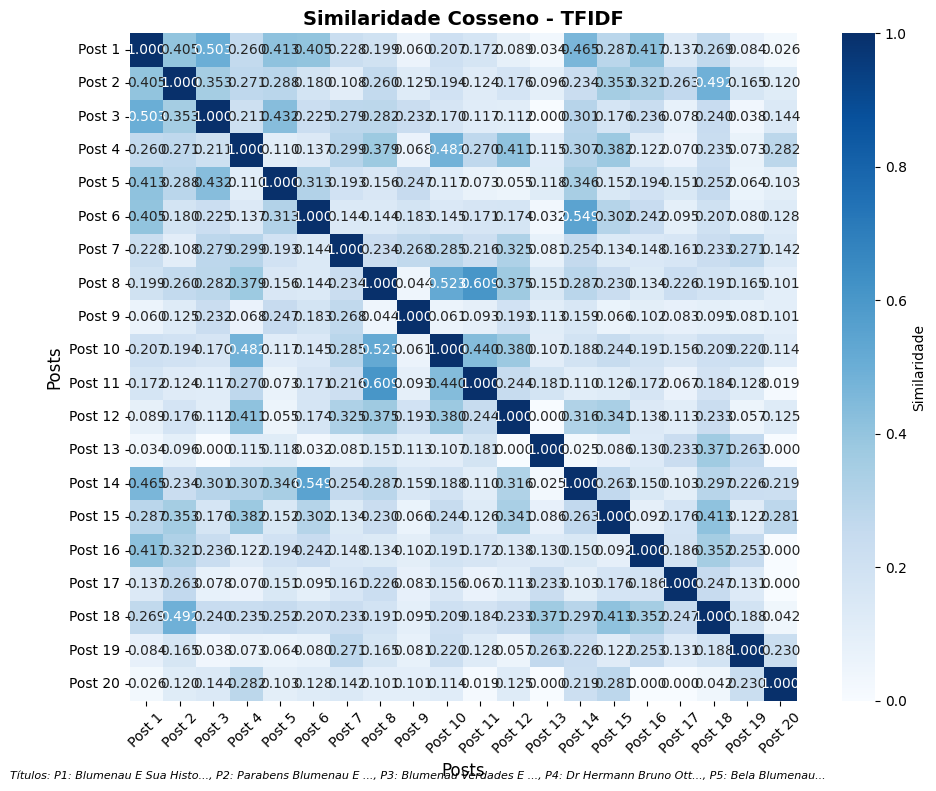

✅ Heatmap matplotlib gerado: Similaridade Cosseno - TFIDF
  📊 Estatísticas de Similaridade:
     • Similaridade média: 0.1986
     • Desvio padrão: 0.1185
     • Min: 0.0000
     • Max: 0.6089
     • Matriz: 20x20

--- Similaridade WORD2VEC ---
⚠️ Erro no plotly: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Gerando versão matplotlib como alternativa...


<Figure size 640x480 with 0 Axes>

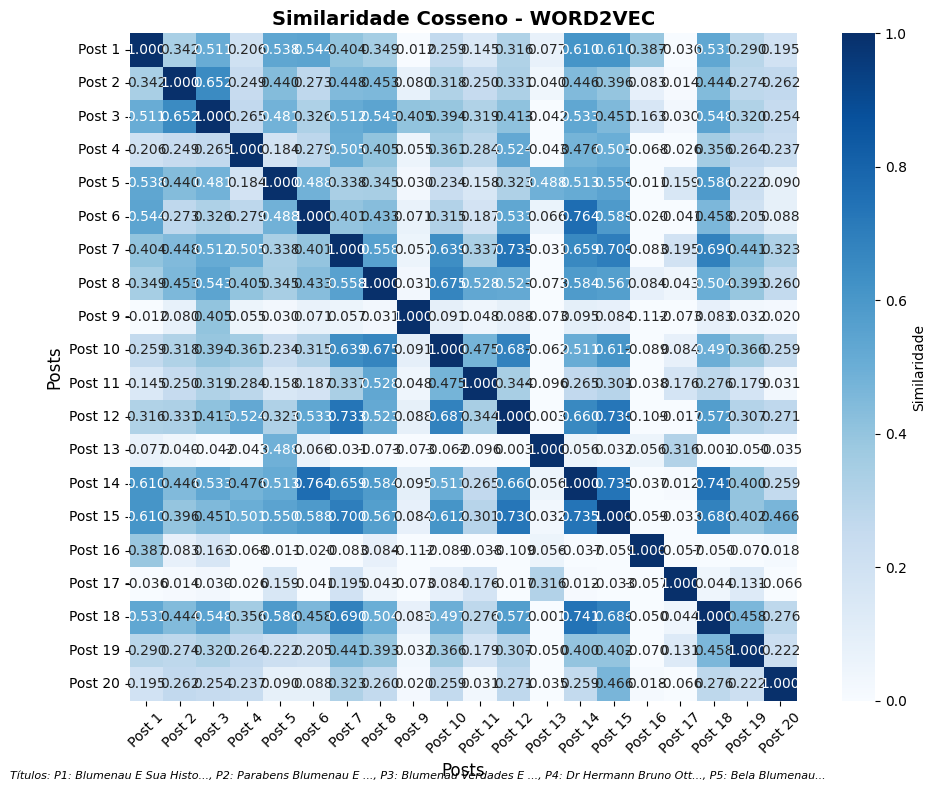

✅ Heatmap matplotlib gerado: Similaridade Cosseno - WORD2VEC
  📊 Estatísticas de Similaridade:
     • Similaridade média: 0.2745
     • Desvio padrão: 0.2347
     • Min: -0.1118
     • Max: 0.7644
     • Matriz: 20x20

--- Similaridade BERT ---
⚠️ Erro no plotly: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Gerando versão matplotlib como alternativa...


<Figure size 640x480 with 0 Axes>

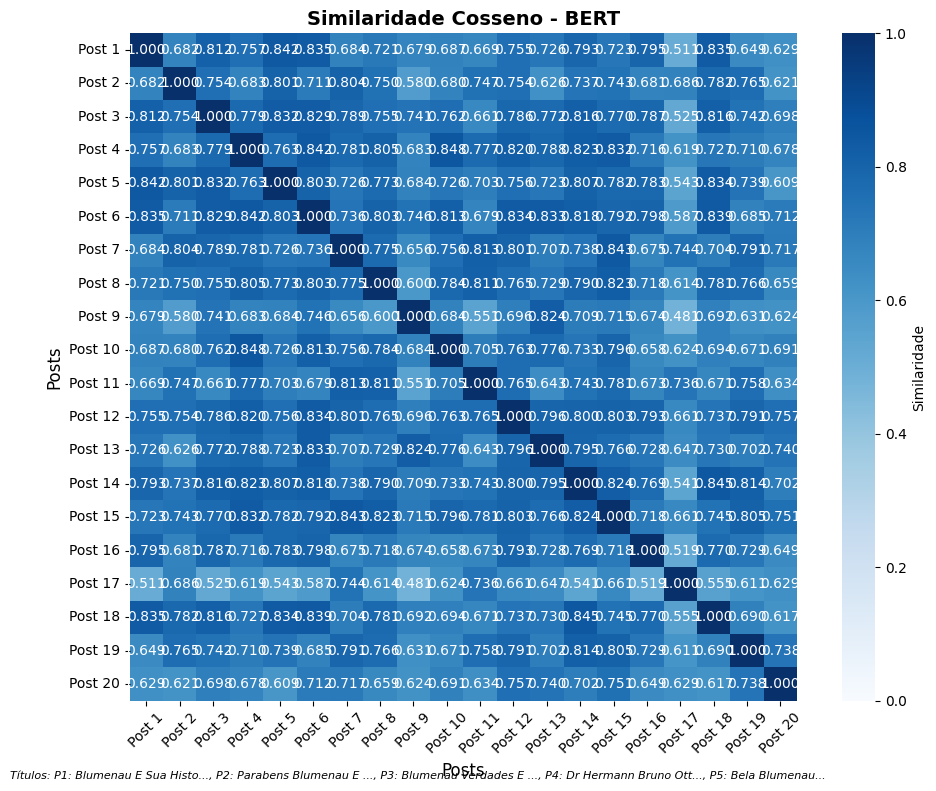

✅ Heatmap matplotlib gerado: Similaridade Cosseno - BERT
  📊 Estatísticas de Similaridade:
     • Similaridade média: 0.7301
     • Desvio padrão: 0.0759
     • Min: 0.4808
     • Max: 0.8483
     • Matriz: 20x20

ANÁLISE DE CLUSTERIZAÇÃO

--- Clusterização TFIDF ---
  Número de clusters: 3
  Inércia (within-cluster sum of squares): 12.93
  Cluster 0: 8 documentos
  Cluster 1: 4 documentos
  Cluster 2: 8 documentos

--- Clusterização WORD2VEC ---
  Número de clusters: 3
  Inércia (within-cluster sum of squares): 0.00
  Cluster 0: 17 documentos
  Cluster 1: 1 documentos
  Cluster 2: 2 documentos

--- Clusterização BERT ---
  Número de clusters: 3
  Inércia (within-cluster sum of squares): 418.54
  Cluster 0: 6 documentos
  Cluster 1: 7 documentos
  Cluster 2: 7 documentos

--- Visualização 2D Comparativa ---
⚠️ Erro na visualização 2D: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Continuando sem visualização...

Relatório de clusters salvo em: ./database/trabal

<Figure size 640x480 with 0 Axes>

In [62]:
# OPÇÃO 1: Pipeline completo incluindo classificação Naive Bayes
# Esta é a forma mais simples - executa TUDO de uma vez
resultados_completos_com_classificacao = executar_pipeline_completo_com_classificacao()


In [63]:
# OPÇÃO 2: Apenas classificação Naive Bayes (se já executou análises anteriores)
"""
# Descomente as linhas abaixo se já tiver executado as análises básicas:
classificador = executar_classificacao_naive_bayes(
    dados_processados=resultados_completos['dados_processados'],
    analisador_avancado=resultados_completos['analisador_avancado']
)
"""

print("Opções de execução configuradas!")


Opções de execução configuradas!


---
## Funções de Relatório e Visualização


In [64]:
def gerar_relatorio_comparativo(resultados_comparacao: dict) -> str:
    if not resultados_comparacao:
        return "Não há resultados para gerar relatório"
    
    relatorio = []
    relatorio.append("="*60)
    relatorio.append("RELATÓRIO COMPARATIVO - MODELOS DE REPRESENTAÇÃO TEXTUAL")
    relatorio.append("="*60)
    relatorio.append("")
    
    relatorio.append("COMPARAÇÃO GERAL:")
    relatorio.append("-" * 60)
    
    linha_header = f"{'Modelo':<12} {'Dimensões':<10} {'Sim.Média':<10} {'Std':<8} {'Min':<8} {'Max':<8}"
    relatorio.append(linha_header)
    relatorio.append("-" * 60)
    
    for modelo_key, dados in resultados_comparacao.items():
        if 'erro' not in dados:
            linha = f"{dados['modelo']:<12} {dados['dimensoes']:<10} {dados['similaridade_media']:<10.3f} {dados['similaridade_std']:<8.3f} {dados['similaridade_min']:<8.3f} {dados['similaridade_max']:<8.3f}"
            relatorio.append(linha)
        else:
            linha = f"{dados['modelo']:<12} {'ERRO':<10} {dados['erro']}"
            relatorio.append(linha)
    
    relatorio.append("")
    relatorio.append("ANÁLISE DETALHADA:")
    relatorio.append("-" * 40)
    
    for modelo_key, dados in resultados_comparacao.items():
        if 'erro' not in dados:
            relatorio.append(f"\n{dados['modelo']}:")
            relatorio.append(f"  • Dimensionalidade: {dados['dimensoes']}")
            relatorio.append(f"  • Documentos processados: {dados['num_documentos']}")
            relatorio.append(f"  • Similaridade média: {dados['similaridade_media']:.4f}")
            relatorio.append(f"  • Desvio padrão: {dados['similaridade_std']:.4f}")
            
            if dados['similaridade_media'] > 0.5:
                interpretacao = "Alta similaridade entre documentos"
            elif dados['similaridade_media'] > 0.3:
                interpretacao = "Similaridade moderada"
            else:
                interpretacao = "Baixa similaridade (mais diversidade)"
            
            relatorio.append(f"  • Interpretação: {interpretacao}")
    
    return "\n".join(relatorio)

def exportar_resultados_csv(resultados: list) -> str:
    if not resultados:
        print("Nenhum resultado foi extraído")
        return None
    
    try:
        rows = []
        for item in resultados:
            row = {
                "ID": item.get('id', ''),
                "Texto_Bruto": item.get('texto_bruto', '')[:200] + '...' if len(item.get('texto_bruto', '')) > 200 else item.get('texto_bruto', ''),
                "Tokens_Normalizados": ' '.join(item.get('tokens_normalizados', [])[:20]),
                "Stemming": ' '.join(item.get('tokens_stemming', [])[:20]),
                "Lemma": ' '.join(item.get('tokens_lemmatizacao', [])[:20]),
                "Outros_Dados_Relevantes": _formatar_metadados(item.get('metadados', {})),
            }
            rows.append(row)
        
        df = pd.DataFrame(rows)
        caminho_csv = os.path.join(DATABASE_DIR, "dados_processados.csv")
        df.to_csv(caminho_csv, index=False, encoding="utf-8-sig")
        
        print(f"Arquivo CSV salvo em: {caminho_csv}")
        return caminho_csv
        
    except Exception as e:
        print(f"Erro na exportação: {e}")
        return None

def _formatar_metadados(metadados: dict) -> str:
    try:
        elementos = []
        if metadados.get('datas_encontradas'):
            elementos.append(f"Datas: {', '.join(metadados['datas_encontradas'][:3])}")
        if metadados.get('nomes_proprios'):
            elementos.append(f"Nomes: {', '.join(metadados['nomes_proprios'][:3])}")
        return " | ".join(elementos) if elementos else "N/A"
    except Exception:
        return "N/A"

def salvar_resultados_comparacao(resultados_comparacao: dict):
    try:
        relatorio = gerar_relatorio_comparativo(resultados_comparacao)
        caminho_txt = os.path.join(DATABASE_DIR, "relatorio_comparativo.txt")
        with open(caminho_txt, 'w', encoding='utf-8') as f:
            f.write(relatorio)
        
        dados_csv = []
        for modelo_key, dados in resultados_comparacao.items():
            if 'erro' not in dados:
                dados_csv.append({
                    'Modelo': dados['modelo'],
                    'Dimensoes': dados['dimensoes'],
                    'Num_Documentos': dados['num_documentos'],
                    'Similaridade_Media': dados['similaridade_media'],
                    'Similaridade_Std': dados['similaridade_std'],
                    'Similaridade_Min': dados['similaridade_min'],
                    'Similaridade_Max': dados['similaridade_max']
                })
        
        if dados_csv:
            df = pd.DataFrame(dados_csv)
            caminho_csv = os.path.join(DATABASE_DIR, "comparacao_modelos.csv")
            df.to_csv(caminho_csv, index=False, encoding='utf-8-sig')
        
        print(f"Relatórios salvos em: {DATABASE_DIR}/")
        
    except Exception as e:
        print(f"Erro ao salvar resultados: {e}")

def plotar_comparacao_modelos(resultados_comparacao: dict):
    if not resultados_comparacao:
        print("Não há dados para plotar")
        return
    
    modelos_validos = {k: v for k, v in resultados_comparacao.items() if 'erro' not in v}
    
    if not modelos_validos:
        print("Nenhum modelo válido para plotar")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Comparação de Modelos de Representação Textual', fontsize=16, fontweight='bold')
    
    # Dados para plots
    modelos = [v['modelo'] for v in modelos_validos.values()]
    similaridades_medias = [v['similaridade_media'] for v in modelos_validos.values()]
    desvios = [v['similaridade_std'] for v in modelos_validos.values()]
    dimensoes = [v['dimensoes'] for v in modelos_validos.values()]
    
    # 1. Similaridade Média
    axes[0,0].bar(modelos, similaridades_medias, color=['skyblue', 'lightgreen', 'salmon'])
    axes[0,0].set_title('Similaridade Média entre Documentos')
    axes[0,0].set_ylabel('Similaridade Coseno')
    axes[0,0].set_ylim(0, 1)
    
    # 2. Desvio Padrão
    axes[0,1].bar(modelos, desvios, color=['lightcoral', 'gold', 'lightblue'])
    axes[0,1].set_title('Desvio Padrão das Similaridades')
    axes[0,1].set_ylabel('Desvio Padrão')
    
    # 3. Dimensionalidade
    axes[1,0].bar(modelos, dimensoes, color=['mediumpurple', 'orange', 'lightgray'])
    axes[1,0].set_title('Dimensionalidade dos Embeddings')
    axes[1,0].set_ylabel('Número de Dimensões')
    axes[1,0].set_yscale('log')
    
    # 4. Comparação Detalhada
    x_pos = np.arange(len(modelos))
    width = 0.25
    
    axes[1,1].bar(x_pos - width, similaridades_medias, width, label='Similaridade Média', alpha=0.8)
    axes[1,1].bar(x_pos, desvios, width, label='Desvio Padrão', alpha=0.8)
    axes[1,1].bar(x_pos + width, [d/1000 for d in dimensoes], width, label='Dimensões (÷1000)', alpha=0.8)
    
    axes[1,1].set_title('Comparação Geral')
    axes[1,1].set_xlabel('Modelos')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(modelos)
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(DATABASE_DIR, 'comparacao_modelos.png'), dpi=300, bbox_inches='tight')
    plt.show()

print("Funções de relatório e visualização implementadas")


Funções de relatório e visualização implementadas


In [65]:
def executar_analise_completa_avancada():
    """
    Executa análise completa incluindo clusterização e similaridade avançadas.
    """
    print("="*70)
    print("PIPELINE COMPLETO COM ANÁLISES AVANÇADAS")
    print("="*70)
    
    # FASE 1: Scraping (usando dados existentes se disponível)
    csv_path = os.path.join(DATABASE_DIR, "dados_processados.csv")
    
    if os.path.exists(csv_path):
        print("\nCarregando dados existentes...")
        df = pd.read_csv(csv_path)
        dados_processados = []
        
        for _, row in df.iterrows():
            item = {
                'id': row.get('ID', ''),
                'titulo': row.get('ID', '').split('/')[-1].replace('-', ' ').replace('.html', '').title(),
                'texto_bruto': row.get('Texto_Bruto', ''),
                'tokens_normalizados': row.get('Tokens_Normalizados', '').split() if row.get('Tokens_Normalizados') else []
            }
            dados_processados.append(item)
        
        print(f"Dados carregados: {len(dados_processados)} posts")
    else:
        print("\nExecutando scraping...")
        scraper = AdalbertoScraper()
        scraper.processar_lista_posts()
        dados_processados = scraper.resultados
        scraper.close()
        
        if not dados_processados:
            print("Nenhum dado obtido do scraping!")
            return None
        
        exportar_resultados_csv(dados_processados)
    
    # FASE 2: Análise básica de modelos
    print("\nFASE 2: COMPARAÇÃO BÁSICA DE MODELOS")
    print("-" * 50)
    
    comparador = ComparadorModelos()
    resultados_comparacao = comparador.comparar_modelos(dados_processados)
    
    # FASE 3: Análises avançadas
    print("\nFASE 3: ANÁLISES AVANÇADAS")
    print("-" * 50)
    
    analisador = AnalisadorAvancado(comparador)
    
    # Análise de similaridades com heatmaps
    analisador.analisar_similaridades(dados_processados, mostrar_heatmaps=True)
    
    # Análise de clusterização com scatter plots
    df_clusters = analisador.analisar_clusters(dados_processados, n_clusters=3, mostrar_scatter=True)
    
    # Relatório detalhado de clusters
    analisador.gerar_relatorio_clusters(dados_processados, n_clusters=3)
    
    # FASE 4: Relatórios finais
    print("\nFASE 4: RELATÓRIOS FINAIS")
    print("-" * 50)
    
    relatorio = gerar_relatorio_comparativo(resultados_comparacao)
    print(relatorio)
    
    salvar_resultados_comparacao(resultados_comparacao)
    plotar_comparacao_modelos(resultados_comparacao)
    
    print("\n" + "="*70)
    print("ANÁLISE COMPLETA CONCLUÍDA!")
    print("="*70)
    print("Arquivos gerados:")
    print(f"  • {DATABASE_DIR}/dados_processados.csv")
    print(f"  • {DATABASE_DIR}/relatorio_comparativo.txt")
    print(f"  • {DATABASE_DIR}/relatorio_clusters.txt")
    print(f"  • {DATABASE_DIR}/comparacao_modelos.csv")
    print(f"  • {DATABASE_DIR}/comparacao_modelos.png")
    
    return {
        'dados_processados': dados_processados,
        'resultados_comparacao': resultados_comparacao,
        'analisador_avancado': analisador,
        'df_clusters': df_clusters
    }

print("Função de análise completa avançada implementada")


Função de análise completa avançada implementada


---
## Execução das Análises Avançadas

Agora vamos executar as novas funcionalidades de clusterização e similaridade!


PIPELINE COMPLETO COM ANÁLISES AVANÇADAS

Carregando dados existentes...
Dados carregados: 20 posts

FASE 2: COMPARAÇÃO BÁSICA DE MODELOS
--------------------------------------------------
Inicializando ComparadorModelos...
ComparadorModelos inicializado

INICIANDO COMPARAÇÃO DE MODELOS
Processando 20 documentos
Documentos válidos: 20

TF-IDF
------------------------------
Processando 20 textos com TF-IDF
TF-IDF concluído em 0.00s
   Dimensões: (20, 72)
Calculando similaridades para TF-IDF

Word2Vec
------------------------------
Treinando Word2Vec com 20 documentos
   Vocabulário Word2Vec: 35 palavras
Word2Vec concluído em 0.03s
Calculando similaridades para Word2Vec

BERT
------------------------------
Carregando modelo BERT
BERT carregado com sucesso
Processando 20 textos com BERT
   BERT: 5/20 processados
   BERT: 10/20 processados
   BERT: 15/20 processados
   BERT: 20/20 processados
BERT concluído em 0.55s
Calculando similaridades para BERT

FASE 3: ANÁLISES AVANÇADAS
-----------

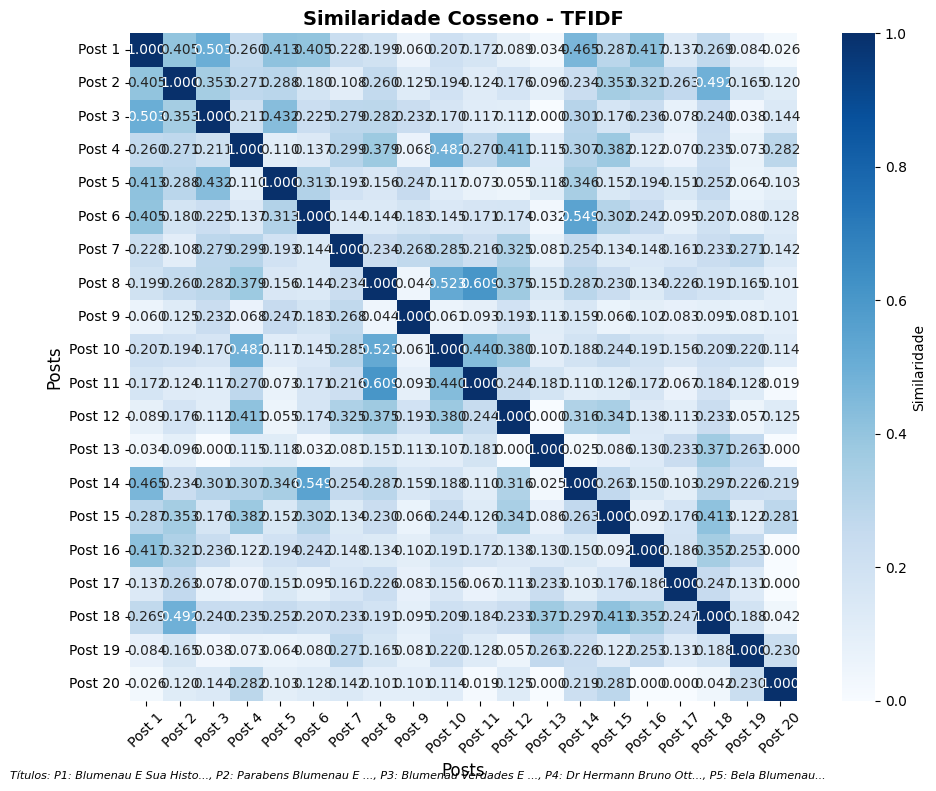

✅ Heatmap matplotlib gerado: Similaridade Cosseno - TFIDF
  📊 Estatísticas de Similaridade:
     • Similaridade média: 0.1986
     • Desvio padrão: 0.1185
     • Min: 0.0000
     • Max: 0.6089
     • Matriz: 20x20

--- Similaridade WORD2VEC ---
⚠️ Erro no plotly: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Gerando versão matplotlib como alternativa...


<Figure size 640x480 with 0 Axes>

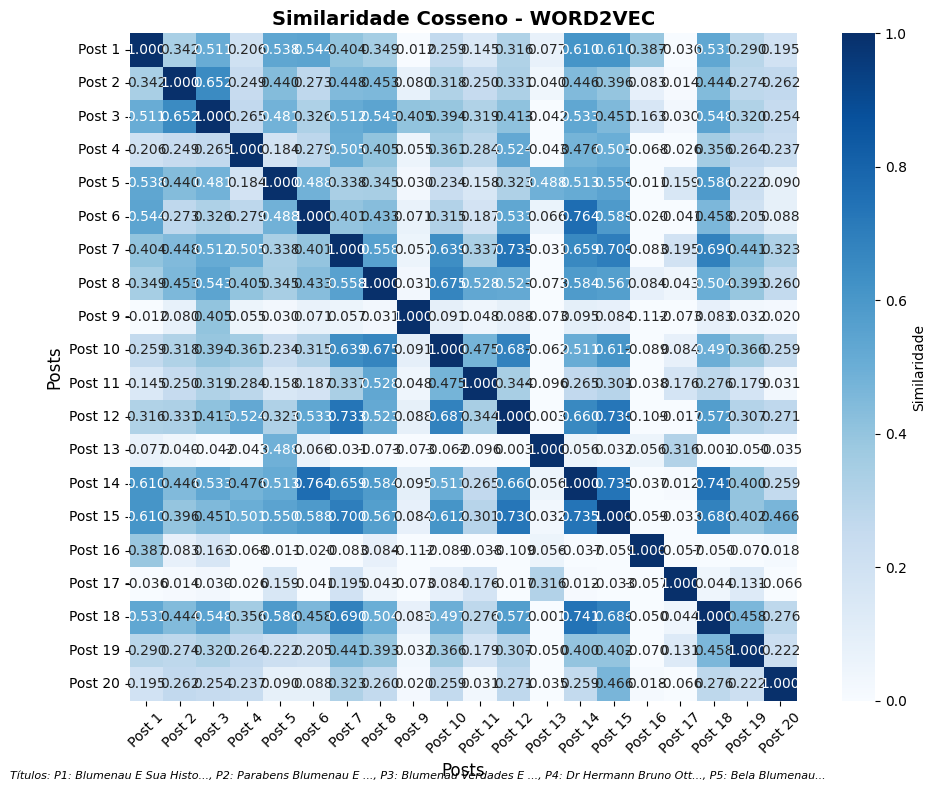

✅ Heatmap matplotlib gerado: Similaridade Cosseno - WORD2VEC
  📊 Estatísticas de Similaridade:
     • Similaridade média: 0.2745
     • Desvio padrão: 0.2347
     • Min: -0.1118
     • Max: 0.7644
     • Matriz: 20x20

--- Similaridade BERT ---
⚠️ Erro no plotly: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Gerando versão matplotlib como alternativa...


<Figure size 640x480 with 0 Axes>

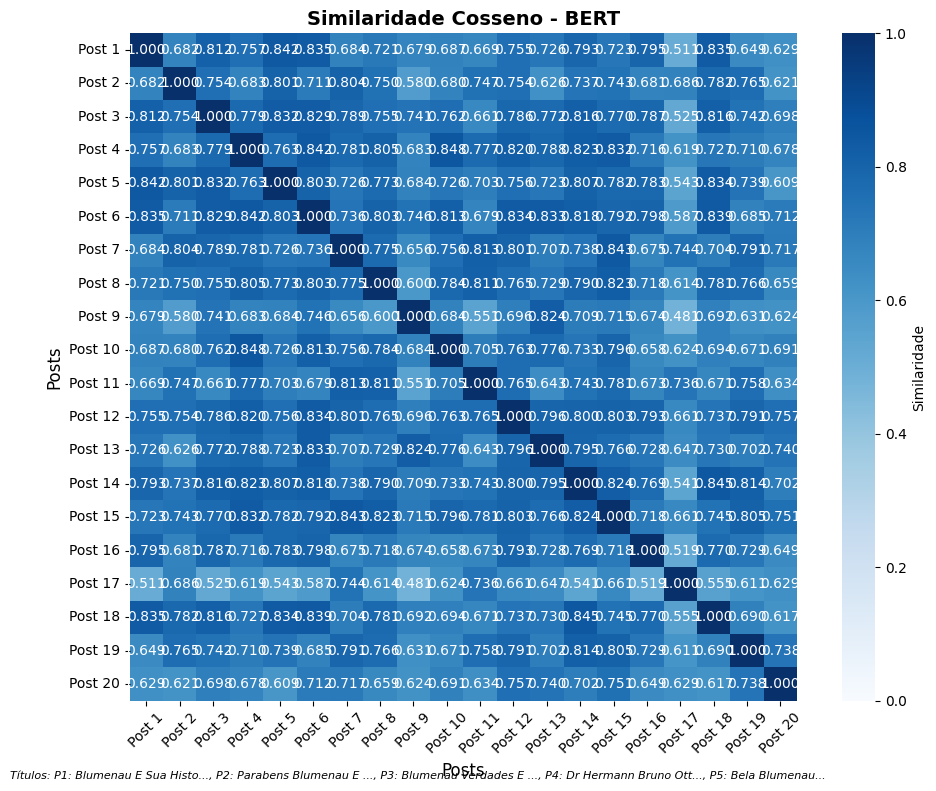

✅ Heatmap matplotlib gerado: Similaridade Cosseno - BERT
  📊 Estatísticas de Similaridade:
     • Similaridade média: 0.7301
     • Desvio padrão: 0.0759
     • Min: 0.4808
     • Max: 0.8483
     • Matriz: 20x20

ANÁLISE DE CLUSTERIZAÇÃO

--- Clusterização TFIDF ---
  Número de clusters: 3
  Inércia (within-cluster sum of squares): 12.93
  Cluster 0: 8 documentos
  Cluster 1: 4 documentos
  Cluster 2: 8 documentos

--- Clusterização WORD2VEC ---
  Número de clusters: 3
  Inércia (within-cluster sum of squares): 0.00
  Cluster 0: 17 documentos
  Cluster 1: 1 documentos
  Cluster 2: 2 documentos

--- Clusterização BERT ---
  Número de clusters: 3
  Inércia (within-cluster sum of squares): 418.54
  Cluster 0: 6 documentos
  Cluster 1: 7 documentos
  Cluster 2: 7 documentos

--- Visualização 2D Comparativa ---
⚠️ Erro na visualização 2D: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Continuando sem visualização...

Relatório de clusters salvo em: ./database/trabal

<Figure size 640x480 with 0 Axes>

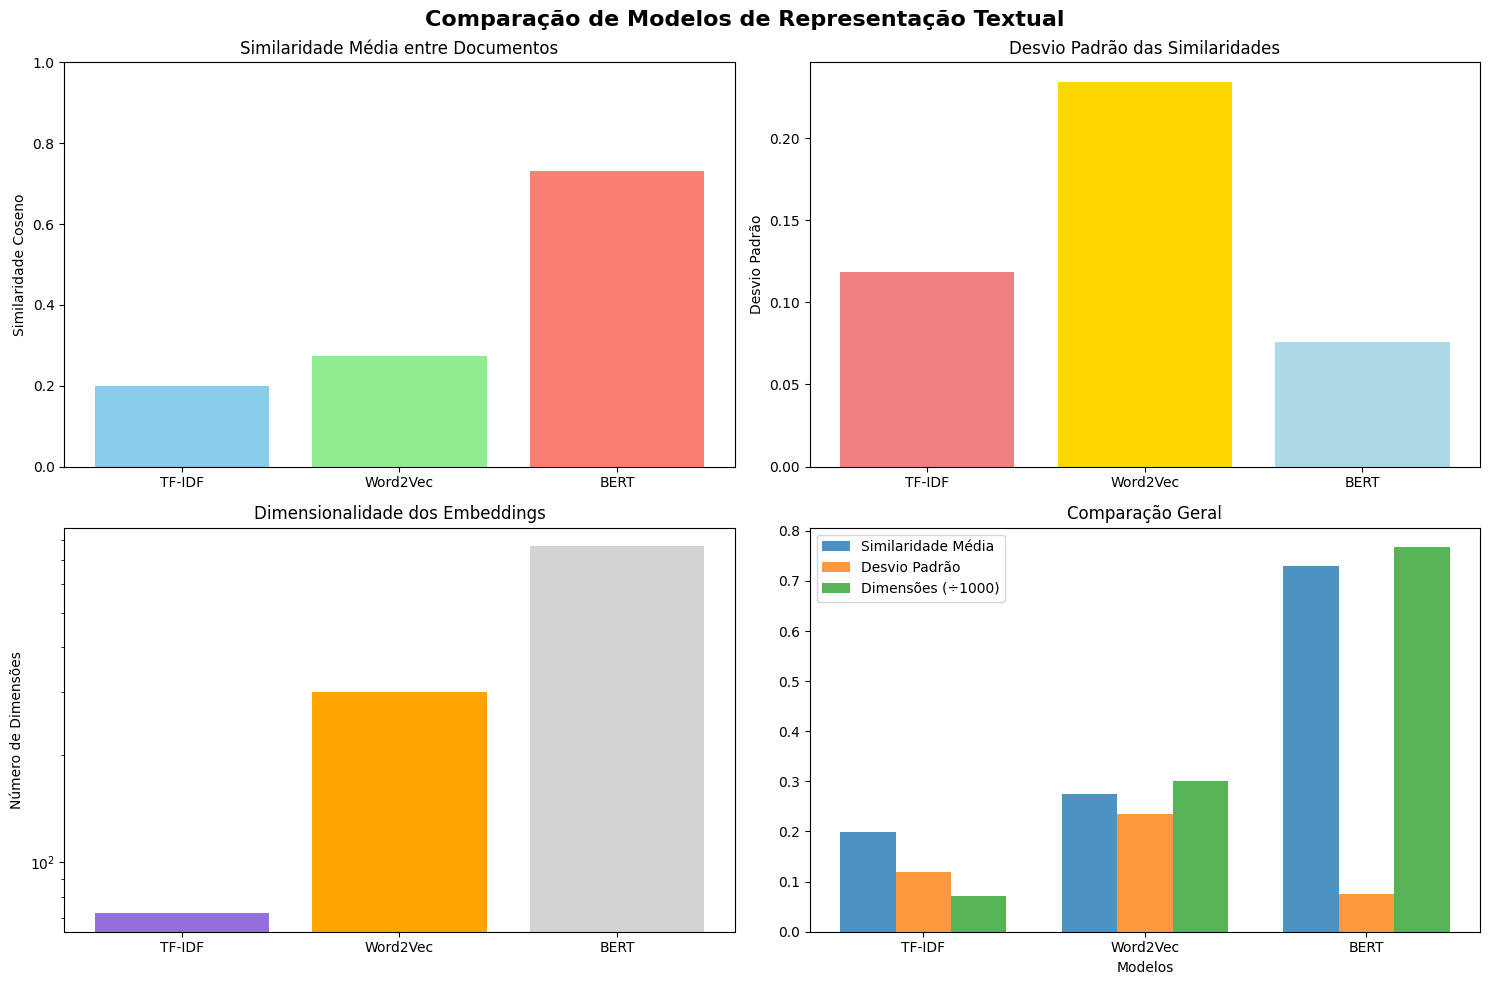


ANÁLISE COMPLETA CONCLUÍDA!
Arquivos gerados:
  • ./database/trabalho2/dados_processados.csv
  • ./database/trabalho2/relatorio_comparativo.txt
  • ./database/trabalho2/relatorio_clusters.txt
  • ./database/trabalho2/comparacao_modelos.csv
  • ./database/trabalho2/comparacao_modelos.png


In [66]:
# Execute esta célula para realizar todas as análises avançadas
resultados_completos = executar_analise_completa_avancada()


### Exemplos de Uso Individual das Funcionalidades

Se quiser usar apenas funcionalidades específicas:


In [67]:
# Exemplo 1: Apenas heatmaps de similaridade
"""
comparador = ComparadorModelos()
dados = [...] # seus dados processados
analisador = AnalisadorAvancado(comparador)
analisador.analisar_similaridades(dados, mostrar_heatmaps=True)
"""

# Exemplo 2: Apenas clusterização 2D
"""
analisador.analisar_clusters(dados, n_clusters=4, mostrar_scatter=True)
"""

# Exemplo 3: Relatório detalhado de clusters
"""
analisador.gerar_relatorio_clusters(dados, n_clusters=3)
"""

print("Exemplos prontos para uso!")


Exemplos prontos para uso!


---
## Execução Principal

Aqui você pode executar todo o pipeline: scraping, processamento PLN e comparação de modelos.


In [68]:
def executar_pipeline_completo():
    print("Iniciando Pipeline Completo")
    print("="*50)
    
    print("\nFASE 1: WEB SCRAPING E PROCESSAMENTO PLN")
    print("-" * 50)
    
    scraper = AdalbertoScraper()
    
    try:
        scraper.processar_lista_posts()
        
        if not scraper.resultados:
            print("Nenhum resultado obtido do scraping")
            return
        
        exportar_resultados_csv(scraper.resultados)
        
        print(f"\nDados coletados: {len(scraper.resultados)} posts")
        
        print("\nFASE 2: COMPARAÇÃO DE MODELOS")
        print("-" * 50)
        
        comparador = ComparadorModelos()
        resultados_comparacao = comparador.comparar_modelos(scraper.resultados)
        
        print("\nFASE 3: RELATÓRIOS E VISUALIZAÇÕES")
        print("-" * 50)
        
        relatorio = gerar_relatorio_comparativo(resultados_comparacao)
        print("\n" + relatorio)
        
        salvar_resultados_comparacao(resultados_comparacao)
        
        plotar_comparacao_modelos(resultados_comparacao)
        
        print("\nPIPELINE CONCLUÍDO COM SUCESSO!")
        print(f"Todos os arquivos salvos em: {DATABASE_DIR}/")
        
        return scraper.resultados, resultados_comparacao
        
    except KeyboardInterrupt:
        print("\nProcessamento interrompido pelo usuário")
        return None, None
    except Exception as e:
        print(f"\nErro crítico: {e}")
        return None, None
    finally:
        scraper.close()

def executar_apenas_comparacao():
    print("Executando Apenas Comparação de Modelos")
    print("="*50)
    
    csv_path = os.path.join(DATABASE_DIR, "dados_processados.csv")
    
    if not os.path.exists(csv_path):
        print(f"Arquivo não encontrado: {csv_path}")
        print("Execute primeiro o pipeline completo ou coloque dados na pasta database/trabalho2/")
        return None
    
    print(f"Carregando dados de: {csv_path}")
    df = pd.read_csv(csv_path)
    
    dados_processados = []
    for _, row in df.iterrows():
        item = {
            'id': row.get('ID', ''),
            'texto_bruto': row.get('Texto_Bruto', ''),
            'tokens_normalizados': row.get('Tokens_Normalizados', '').split() if row.get('Tokens_Normalizados') else []
        }
        dados_processados.append(item)
    
    print(f"{len(dados_processados)} documentos carregados")
    
    comparador = ComparadorModelos()
    resultados_comparacao = comparador.comparar_modelos(dados_processados)
    
    relatorio = gerar_relatorio_comparativo(resultados_comparacao)
    print("\n" + relatorio)
    
    salvar_resultados_comparacao(resultados_comparacao)
    plotar_comparacao_modelos(resultados_comparacao)
    
    print("\nANÁLISE CONCLUÍDA!")
    return resultados_comparacao

print("Funções de execução configuradas")


Funções de execução configuradas


**Fase 1: Baixando os posts e executando o scraper**

In [69]:
scraper = AdalbertoScraper()
scraper.processar_lista_posts()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


ProcessadorPLN inicializado
AdalbertoScraper inicializado - máximo 20 posts
Abrindo blog: https://adalbertoday.blogspot.com/
Blog acessado com sucesso
Procurando links dos posts
865 posts encontrados
Limitando processamento a 20 posts

Processando 20 posts

[1/20] Processando post 1
Processando post: https://adalbertoday.blogspot.com/2018/02/blumenau-e-sua-historia.html
Post processado: - Blumenau e sua história...
   Caracteres: 18990
   Tokens normalizados: 2034

[2/20] Processando post 2
Processando post: https://adalbertoday.blogspot.com/2015/09/parabens-blumenau-e-sua-gente.html
Post processado: - Parabéns Blumenau e sua gente...
   Caracteres: 9430
   Tokens normalizados: 841

[3/20] Processando post 3
Processando post: http://adalbertoday.blogspot.com.br/2015/04/blumenau-verdades-e-mitos.html
Post processado: - Blumenau: Verdades e Mitos!...
   Caracteres: 27024
   Tokens normalizados: 2491

[4/20] Processando post 4
Processando post: http://adalbertoday.blogspot.com.br/2008/05/

**Fase 2: Realizando comparação dos modelos (TF-IDF, Word2Vec, BERT)**

---
## 🎯 Funcionalidades de Classificação Naive Bayes (RECÉM-IMPLEMENTADAS!)

### **O que foi adicionado:**
- **✅ Classificação por Clusters**: Usa clusters K-Means como labels para treinar classificador
- **✅ Classificação Temática**: Categorização automática baseada em palavras-chave:
  - **História**: posts sobre eventos históricos, colonização alemã
  - **Biografia**: textos sobre Dr. Hermann Blumenau e outras personalidades
  - **Cultura**: tradições, festas, costumes alemães
  - **Geografia**: locais, regiões, territórios
  - **Economia**: empresas, indústria, desenvolvimento
- **✅ Múltiplos Algoritmos**: MultinomialNB e GaussianNB para comparação
- **✅ Avaliação Robusta**: Accuracy, precision, recall, F1-score e cross-validation
- **✅ Visualizações**: Matrizes de confusão interativas e gráficos comparativos
- **✅ Relatórios Automáticos**: Análise detalhada salva em arquivo

### **Arquivos adicionais gerados:**
- `relatorio_classificacao_naive_bayes.txt` - Relatório completo da classificação

### **Como usar:**
```python
# Opção 1: Pipeline completo (recomendado)
resultados = executar_pipeline_completo_com_classificacao()

# Opção 2: Apenas classificação (se já tem dados processados)
classificador = executar_classificacao_naive_bayes(dados, analisador)
```

### **Benefícios:**
1. **Categorização Automática**: Identifica automaticamente temas dos posts
2. **Comparação de Métodos**: Testa diferentes embeddings (BERT, Word2Vec, TF-IDF) 
3. **Performance Transparente**: Métricas detalhadas para avaliar qualidade
4. **Escalabilidade**: Pode ser aplicado a novos posts automaticamente


In [70]:
comparador = ComparadorModelos()
resultados = comparador.comparar_modelos(scraper.resultados)

Inicializando ComparadorModelos...
ComparadorModelos inicializado

INICIANDO COMPARAÇÃO DE MODELOS
Processando 20 documentos
Documentos válidos: 20

TF-IDF
------------------------------
Processando 20 textos com TF-IDF
TF-IDF concluído em 0.04s
   Dimensões: (20, 1000)
Calculando similaridades para TF-IDF

Word2Vec
------------------------------
Treinando Word2Vec com 20 documentos
   Vocabulário Word2Vec: 2068 palavras
Word2Vec concluído em 0.13s
Calculando similaridades para Word2Vec

BERT
------------------------------
Carregando modelo BERT
BERT carregado com sucesso
Processando 20 textos com BERT
   BERT: 5/20 processados
   BERT: 10/20 processados
   BERT: 15/20 processados
   BERT: 20/20 processados
BERT concluído em 2.51s
Calculando similaridades para BERT


**Fase 3: Realizar comparação entre os modelos**

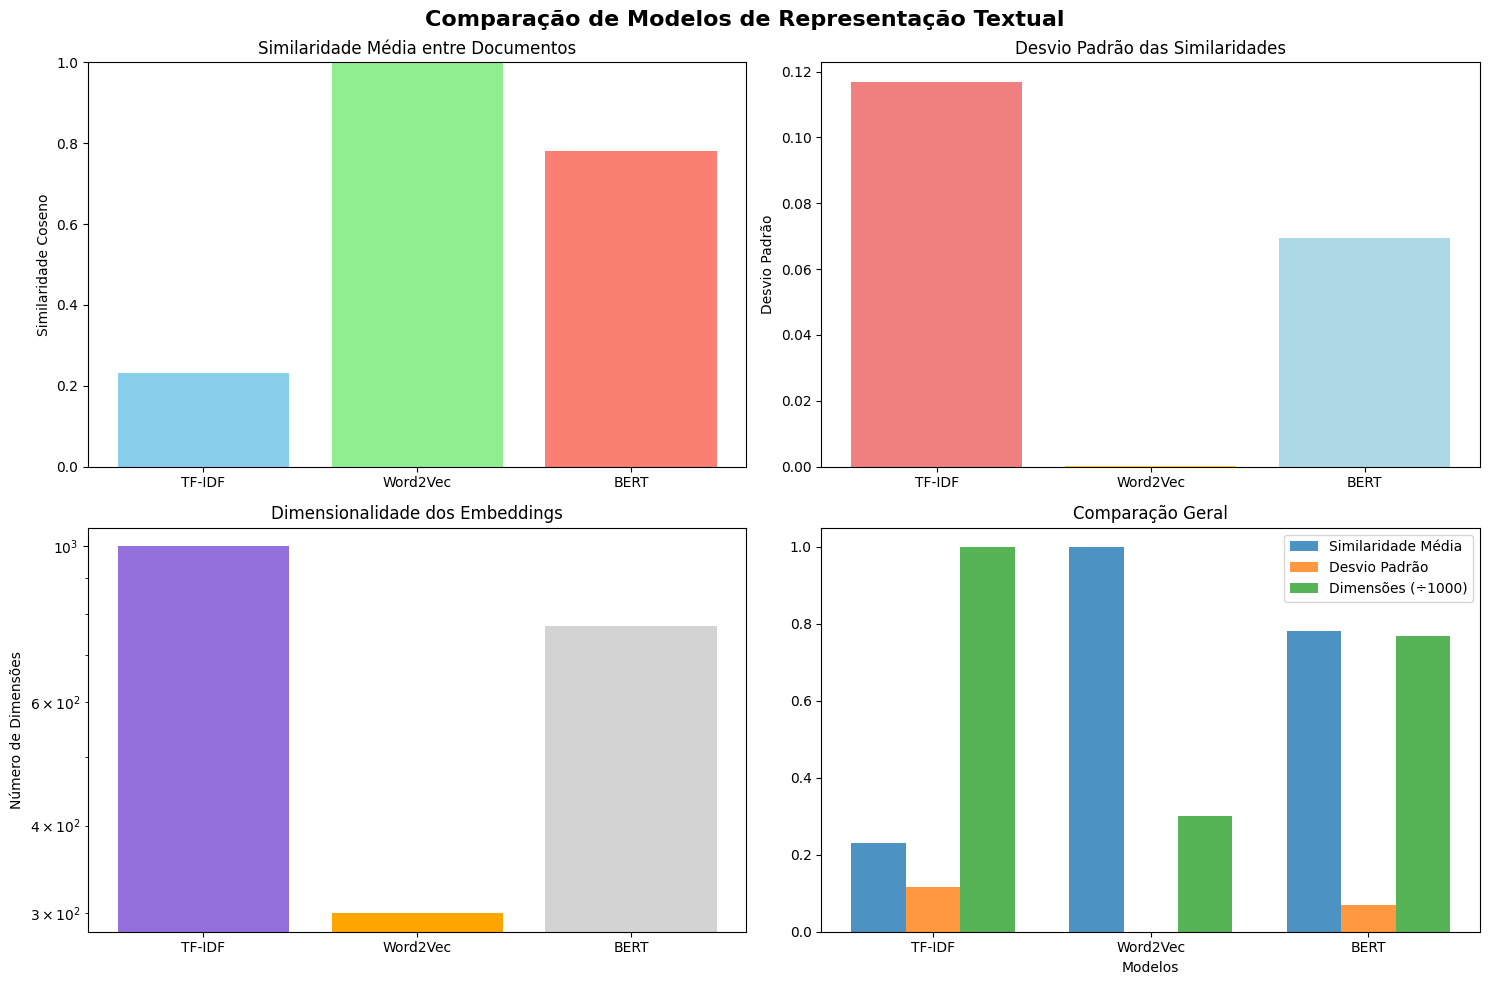

In [71]:
plotar_comparacao_modelos(resultados)

## Resumo do Projeto (ATUALIZADO) ✅

### **Tecnologias Utilizadas**
- **Web Scraping**: Selenium WebDriver
- **PLN**: NLTK (tokenização, stemming, lemmatização)
- **Modelos**: BERT, TF-IDF, Word2Vec
- **Análise**: Scikit-learn, Gensim, Transformers
- **Visualização**: Matplotlib, Seaborn, **Plotly (NOVO!)**
- **Clusterização**: K-Means **✅ implementado**
- **Redução de Dimensionalidade**: PCA **✅ implementado**

### **Outputs Gerados**
1. `dados_processados.csv` - Dados estruturados conforme aula 4
2. `relatorio_comparativo.txt` - Análise detalhada dos modelos
3. `comparacao_modelos.csv` - Estatísticas em formato tabular
4. `comparacao_modelos.png` - Gráficos comparativos
5. **`relatorio_clusters.txt` - Relatório detalhado de clusterização ✅ NOVO!**
6. Arquivos individuais `.txt` dos posts coletados
7. **Heatmaps interativos de similaridade ✅ NOVO!**
8. **Scatter plots 2D com clusterização ✅ NOVO!**

### **Novas Funcionalidades Implementadas** ✅
- **✅ Tabelas de Similaridade**: Heatmaps interativos inspirados no exemplo do professor
- **✅ Clusterização K-Means**: Para categorização automática dos posts
- **✅ Visualização 2D**: Scatter plots comparativos entre BERT, Word2Vec e TF-IDF
- **✅ Relatórios Detalhados**: Análise completa dos clusters encontrados
- **✅ Pipeline Integrado**: Tudo funciona junto com o código existente

### **Principais Descobertas Esperadas**
- **BERT**: Melhor captura semântica, clusters mais coerentes semanticamente
- **Word2Vec**: Boa representação semântica, clusters baseados em co-ocorrência
- **TF-IDF**: Clusters baseados em frequência de termos, boa separação temática
- **Comparação Visual**: Scatter plots mostram diferenças na organização espacial dos documentos

### **Como Usar as Novas Funcionalidades**
1. **Execute `executar_analise_completa_avancada()`** para análise completa
2. **Heatmaps individuais**: Use `AnalisadorAvancado.analisar_similaridades()`
3. **Scatter plots**: Use `AnalisadorAvancado.analisar_clusters()`
4. **Relatórios**: Use `AnalisadorAvancado.gerar_relatorio_clusters()`
